In [89]:
%load_ext autoreload
%autoreload 2

In [90]:
import sys
sys.path.append("/n/home12/binxuwang/Github/Neuro-ActMax-GAN-comparison")
from core.utils.plot_utils import saveallforms
from insilico_analysis.insilico_analysis_lib import sweep_dir

In [91]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from glob import glob
from tqdm import tqdm, trange

In [ ]:
figdir = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/BigGAN_Project/CCN_dynamics_figs"

### Convrnn

In [108]:
# rootdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/convrnn_Evol"

In [6]:
!ls {rootdir}

rgc_intermediate-conv10_dyn	    rgc_intermediate-conv6_dyn
rgc_intermediate-conv10_dyn_BigGAN  rgc_intermediate-conv6_dyn_BigGAN
rgc_intermediate-conv10_timewdw     rgc_intermediate-conv6_timewdw
rgc_intermediate-conv1_dyn	    rgc_intermediate-conv7
rgc_intermediate-conv1_dyn_BigGAN   rgc_intermediate-conv7_dyn
rgc_intermediate-conv1_timewdw	    rgc_intermediate-conv7_dyn_BigGAN
rgc_intermediate-conv2_dyn	    rgc_intermediate-conv7_timewdw
rgc_intermediate-conv2_dyn_BigGAN   rgc_intermediate-conv8_dyn
rgc_intermediate-conv2_timewdw	    rgc_intermediate-conv8_dyn_BigGAN
rgc_intermediate-conv3_dyn	    rgc_intermediate-conv8_timewdw
rgc_intermediate-conv3_dyn_BigGAN   rgc_intermediate-conv9_dyn
rgc_intermediate-conv3_timewdw	    rgc_intermediate-conv9_dyn_BigGAN
rgc_intermediate-conv4_dyn	    rgc_intermediate-conv9_timewdw
rgc_intermediate-conv4_dyn_BigGAN   rgc_intermediate-imnetds_dyn
rgc_intermediate-conv4_timewdw	    rgc_intermediate-imnetds_dyn_BigGAN
rgc_intermediate-conv5_dyn	    s

In [137]:
def parse_npz_files_BigGAN(rootdir, netname, layername):
    layerdir = f"{netname}-{layername}_dyn_BigGAN"
    file_pattern = rf"scores_{layername}_chan(\d*)_T(\d*)_CholCMA-BigGAN_(\d*).npz"
    pattern = re.compile(file_pattern)
    files = sorted(glob(join(rootdir, layerdir, "*.npz")))
    meta = []
    for file in tqdm(files):
        matches = re.findall(pattern, file)
        if matches:
            chan, T, RND = matches[0]
            data = np.load(file)
            scores_dyn = data["scores_dyn"]
            generations = data["generations"]
            best_score = np.max(scores_dyn,axis=0)
            best_avg_score = np.mean(scores_dyn[generations==generations.max(),:],axis=0)
            meta.append({"file": file, "netname":netname, "layer":layername, 
                         "chan": int(chan), "T": int(T), "RND": int(RND), 
                         "best_avg_score": best_avg_score, "best_score": best_score})
    df = pd.DataFrame(meta)
    return df


def parse_npz_files(rootdir, netname, layername):
    layerdir = f"{netname}-{layername}_dyn"
    file_pattern = rf"scores_{layername}_chan(\d*)_T(\d*).npz"
    pattern = re.compile(file_pattern)
    files = sorted(glob(join(rootdir, layerdir, "*.npz")))
    meta = []
    for file in tqdm(files):
        matches = re.findall(pattern, file)
        if matches:
            chan, T = matches[0]
            data = np.load(file)
            scores_dyn = data["scores_dyn"]
            generations = data["generations"]
            best_score = np.max(scores_dyn,axis=0)
            best_avg_score = np.mean(scores_dyn[generations==generations.max(),:],axis=0)
            meta.append({"file": file, "netname":netname, "layer":layername, 
                         "chan": int(chan), "T": int(T), 
                         "best_avg_score": best_avg_score, "best_score": best_score})
    df = pd.DataFrame(meta)
    return df

In [178]:
def mean_lists(series):
    return np.mean([np.array(item) for item in series], axis=0)#.tolist()

def std_lists(series):
    return (np.std([np.array(item) for item in series], axis=0))#.tolist()

def sem_lists(series):
    N = len(series)
    return (np.std([np.array(item) for item in series], axis=0) / np.sqrt(N))#.tolist()

#### Mass compute and save

In [ ]:
convrnn_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/convrnn_Evol"


In [ ]:
!ls {convrnn_root}

rgc_intermediate-conv10_dyn	    rgc_intermediate-conv6_dyn
rgc_intermediate-conv10_dyn_BigGAN  rgc_intermediate-conv6_dyn_BigGAN
rgc_intermediate-conv10_timewdw     rgc_intermediate-conv6_timewdw
rgc_intermediate-conv1_dyn	    rgc_intermediate-conv7
rgc_intermediate-conv1_dyn_BigGAN   rgc_intermediate-conv7_dyn
rgc_intermediate-conv1_timewdw	    rgc_intermediate-conv7_dyn_BigGAN
rgc_intermediate-conv2_dyn	    rgc_intermediate-conv7_timewdw
rgc_intermediate-conv2_dyn_BigGAN   rgc_intermediate-conv8_dyn
rgc_intermediate-conv2_timewdw	    rgc_intermediate-conv8_dyn_BigGAN
rgc_intermediate-conv3_dyn	    rgc_intermediate-conv8_timewdw
rgc_intermediate-conv3_dyn_BigGAN   rgc_intermediate-conv9_dyn
rgc_intermediate-conv3_timewdw	    rgc_intermediate-conv9_dyn_BigGAN
rgc_intermediate-conv4_dyn	    rgc_intermediate-conv9_timewdw
rgc_intermediate-conv4_dyn_BigGAN   rgc_intermediate-imnetds_dyn
rgc_intermediate-conv4_timewdw	    rgc_intermediate-imnetds_dyn_BigGAN
rgc_intermediate-conv5_dyn	    s

In [138]:
convrnn_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/convrnn_Evol"
df_all = []
for layername in ["conv1", "conv2", "conv3", "conv4", "conv5", "conv6", "conv7", "conv8", "conv9", "conv10", "imnetds"]:
    df_FC = parse_npz_files(convrnn_root, "rgc_intermediate", layername)
    df_FC["GANname"] = "DeePSim"
    df_BG = parse_npz_files_BigGAN(convrnn_root, "rgc_intermediate", layername)
    df_BG["GANname"] = "BigGAN"
    df_all.append(df_FC)
    df_all.append(df_BG)

  0%|          | 0/800 [00:00<?, ?it/s]

100%|██████████| 350/350 [00:00<00:00, 1098.90it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [139]:
df_convrnn = pd.concat(df_all, axis=0)

In [142]:
df_convrnn["T"] = df_convrnn["T"].astype(int)

In [143]:
def extract_Tth_element(row, key='best_avg_score'):
    try:
        return row[key][- (16 - row["T"] + 1)]
    except IndexError:
        return None

# T = 0  # replace with your desired index
# df_convrnn['Tth_element'] = 
df_convrnn["best_avg_score_scalar"] = df_convrnn.apply(extract_Tth_element, axis=1, args=('best_avg_score',)) 
df_convrnn["best_score_scalar"] = df_convrnn.apply(extract_Tth_element, axis=1, args=('best_score',)) 

In [144]:
df_convrnn.to_pickle(join(figdir, "df_convrnn_BigGAN_score_summary.pkl"))
df_convrnn.to_csv(join(figdir, "df_convrnn_BigGAN_score_summary.csv"))

##### Visualize

In [145]:
df_convrnn.netname.unique()

array(['rgc_intermediate'], dtype=object)

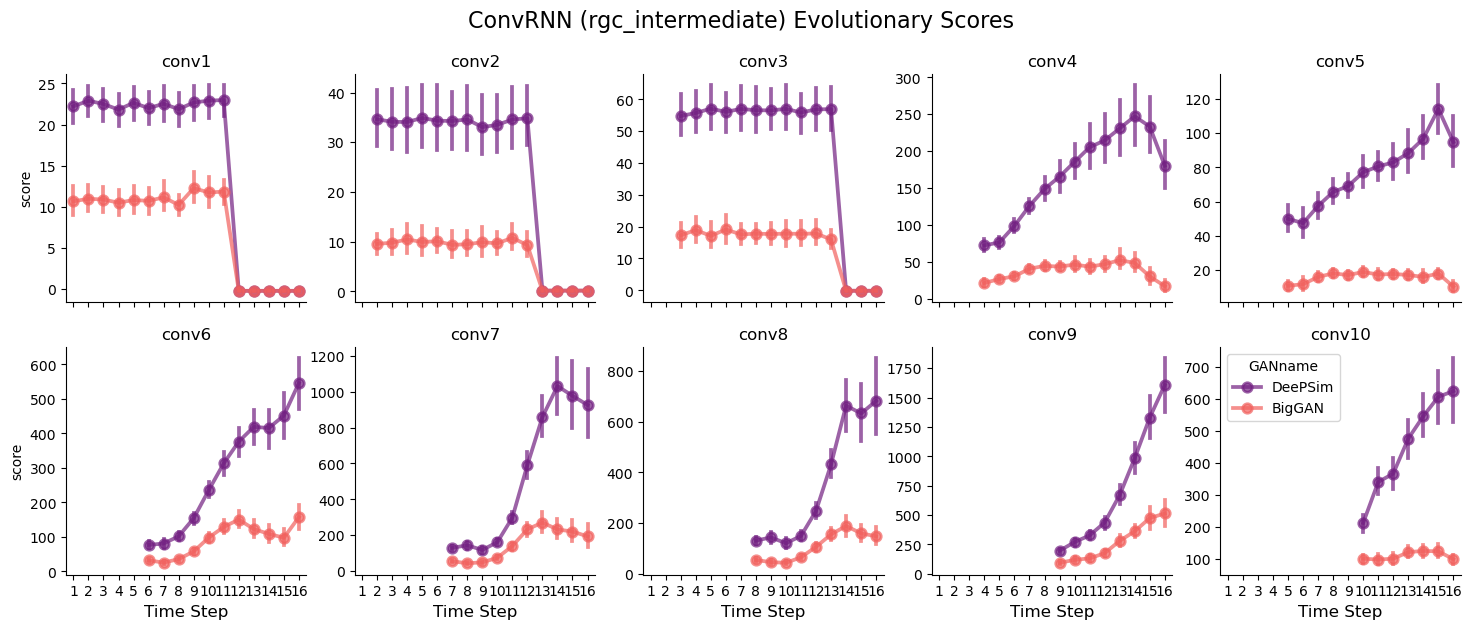

In [155]:
# for optimizer in df_convrnn['optimizer'].unique():
figh, axs = plt.subplots(2, 5, figsize=(18, 6.5), sharex=True, sharey=False)
layers = df_convrnn.layer.unique()
for axi, layer in enumerate(layers):
    ax = axs.flatten()[axi]
    df_layer = df_convrnn[(df_convrnn['layer'] == layer)]
    sns.pointplot(data=df_layer, x='T', y='best_avg_score_scalar', hue='GANname', ax=ax, 
                    linestyles='-', palette='magma', hue_order=['DeePSim', 'BigGAN'],
                    legend=True if axi == 9 else False, alpha=0.7)
    # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
    ax.set_title(layer, )
    ax.set_xlabel('Time Step', fontsize=12)
    if axi == 0 or axi == 5:
        ax.set_ylabel('score', )
    else:
        ax.set_ylabel('')
figh.suptitle(f'ConvRNN (rgc_intermediate) Evolutionary Scores', fontsize=16)
saveallforms(figdir, f'ConvRNN_rgc_intermediate_Evol_Scores_time_traj', figh)

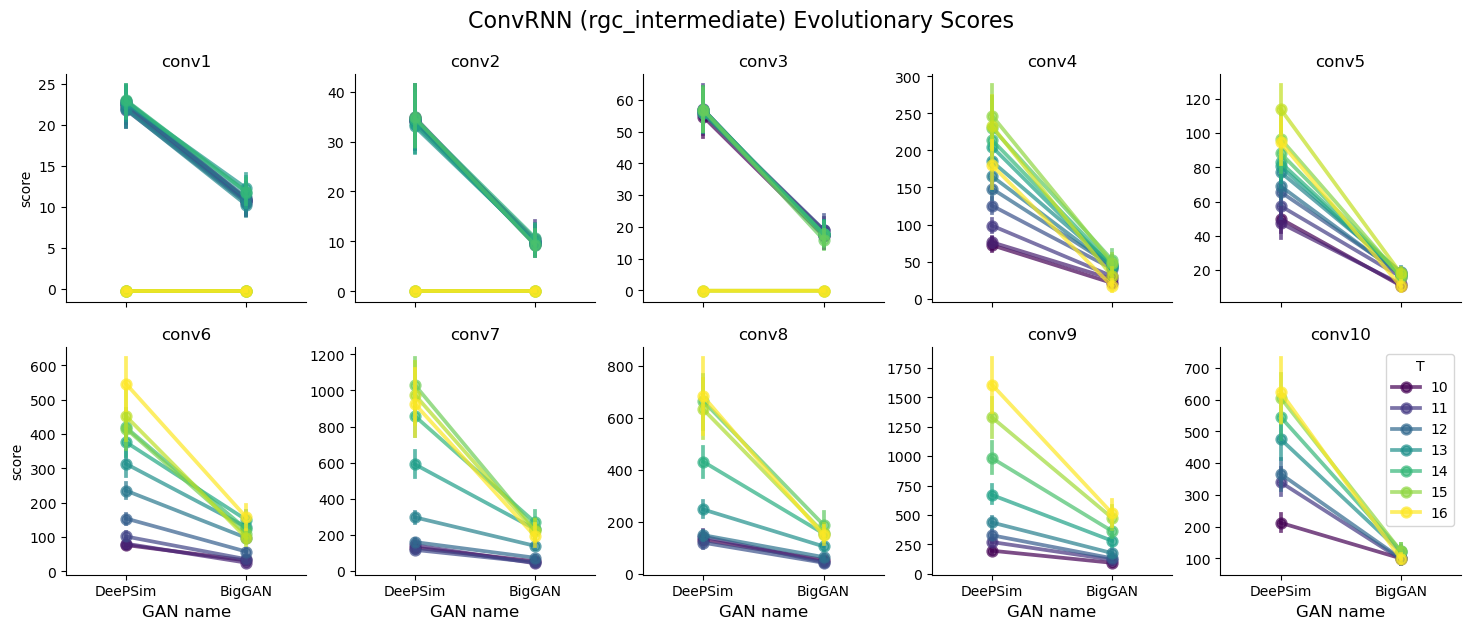

In [158]:
# for optimizer in df_convrnn['optimizer'].unique():
figh, axs = plt.subplots(2, 5, figsize=(18, 6.5), sharex=True, sharey=False)
layers = df_convrnn.layer.unique()
for axi, layer in enumerate(layers):
    ax = axs.flatten()[axi]
    df_layer = df_convrnn[(df_convrnn['layer'] == layer)]
    sns.pointplot(data=df_layer, x='GANname', y='best_avg_score_scalar', hue='T', ax=ax, 
                    palette='viridis', order=['DeePSim', 'BigGAN'],
                    legend=True if axi == 9 else False, alpha=0.7)
    # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
    ax.set_title(layer, )
    ax.set_xlabel('GAN name', fontsize=12)
    if axi == 0 or axi == 5:
        ax.set_ylabel('score', )
    else:
        ax.set_ylabel('')
figh.suptitle(f'ConvRNN (rgc_intermediate) Evolutionary Scores', fontsize=16)
saveallforms(figdir, f'ConvRNN_rgc_intermediate_Evol_Scores_line_cmp', figh)

##### Individual layer figure

In [ ]:
convrnn_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/convrnn_Evol"
df_FC = parse_npz_files(convrnn_root, "rgc_intermediate", "conv9")
df_BG = parse_npz_files_BigGAN(convrnn_root, "rgc_intermediate", "conv9")

100%|██████████| 400/400 [00:04<00:00, 81.82it/s] 


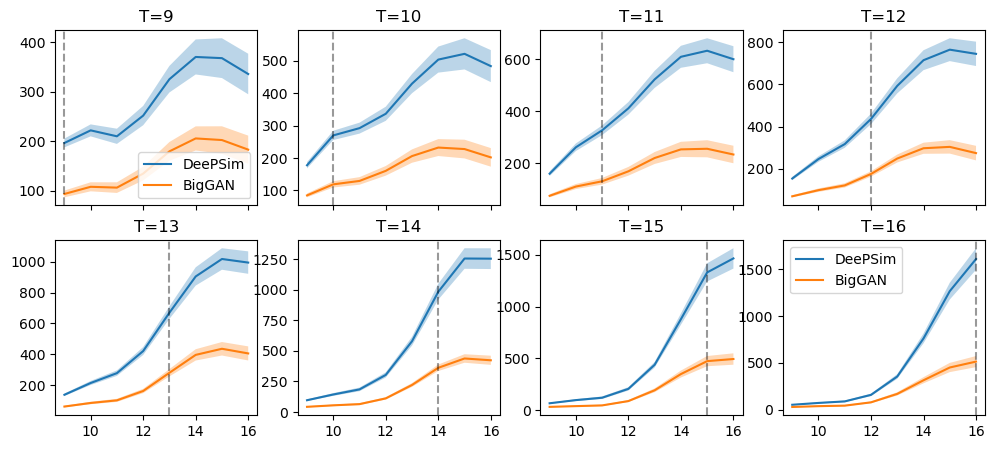

In [ ]:
FC_mean = df_FC.groupby("T").agg({"best_avg_score": "mean"})
FC_sem = df_FC.groupby("T").agg({"best_avg_score": sem_lists})
BG_mean = df_BG.groupby("T").agg({"best_avg_score": "mean"})
BG_sem = df_BG.groupby("T").agg({"best_avg_score": sem_lists})
Ts = df_FC["T"].unique()
figh, axh = plt.subplots(2,4,figsize=(12,5), sharex=True, ) # sharey=True
axs = axh.flatten()
Tlist = Ts
for axi, iT in enumerate(Ts):
    ax = axs[axi]
    ax.plot(Tlist, FC_mean.loc[iT].best_avg_score, label="DeePSim")
    ax.fill_between(Tlist, FC_mean.loc[iT].best_avg_score-FC_sem.loc[iT].best_avg_score,
                    FC_mean.loc[iT].best_avg_score+FC_sem.loc[iT].best_avg_score, alpha=0.3)
    ax.plot(Tlist, BG_mean.loc[iT].best_avg_score, label="BigGAN")
    ax.fill_between(Tlist, BG_mean.loc[iT].best_avg_score-BG_sem.loc[iT].best_avg_score,
                    BG_mean.loc[iT].best_avg_score+BG_sem.loc[iT].best_avg_score, alpha=0.3)
    # ax.set_xticks()
    ax.axvline(iT, color="k", linestyle="--", alpha=0.4)
    ax.set_title(f"T={iT}")
    if axi == 0:
        ax.legend()
    
plt.legend()

In [ ]:
df_FC = parse_npz_files(convrnn_root, "rgc_intermediate", "conv7")
df_BG = parse_npz_files_BigGAN(convrnn_root, "rgc_intermediate", "conv7")

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:15<00:00, 33.18it/s]


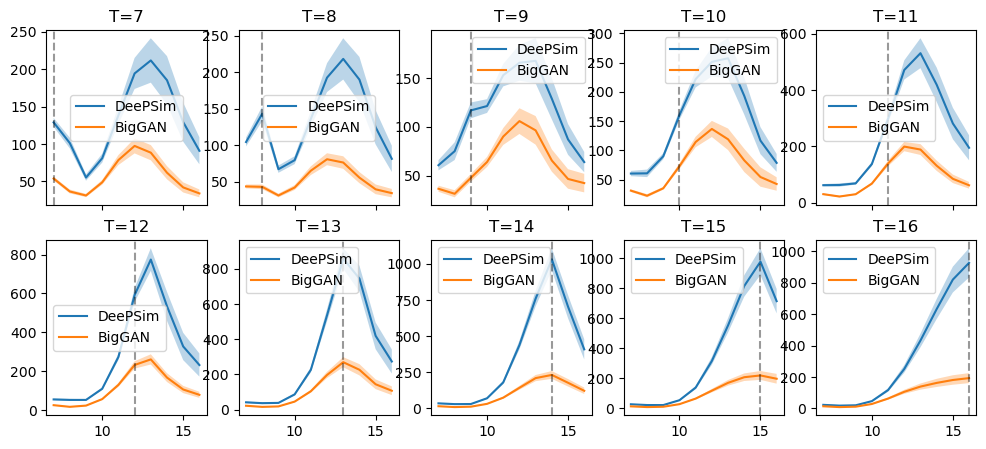

In [ ]:
FC_mean = df_FC.groupby("T").agg({"best_avg_score": "mean"})
FC_sem = df_FC.groupby("T").agg({"best_avg_score": sem_lists})
BG_mean = df_BG.groupby("T").agg({"best_avg_score": "mean"})
BG_sem = df_BG.groupby("T").agg({"best_avg_score": sem_lists})
Ts = df_FC["T"].unique()
figh, axh = plt.subplots(2,5,figsize=(12,5), sharex=True, ) # sharey=True
axs = axh.flatten()
Tlist = Ts
for axi, iT in enumerate(Ts):
    ax = axs[axi]
    ax.plot(Tlist, FC_mean.loc[iT].best_avg_score, label="DeePSim")
    ax.fill_between(Tlist, FC_mean.loc[iT].best_avg_score-FC_sem.loc[iT].best_avg_score,
                    FC_mean.loc[iT].best_avg_score+FC_sem.loc[iT].best_avg_score, alpha=0.3)
    ax.plot(Tlist, BG_mean.loc[iT].best_avg_score, label="BigGAN")
    ax.fill_between(Tlist, BG_mean.loc[iT].best_avg_score-BG_sem.loc[iT].best_avg_score,
                    BG_mean.loc[iT].best_avg_score+BG_sem.loc[iT].best_avg_score, alpha=0.3)
    # ax.set_xticks()
    ax.axvline(iT, color="k", linestyle="--", alpha=0.4)
    ax.set_title(f"T={iT}")
    ax.legend()    
    
plt.legend()

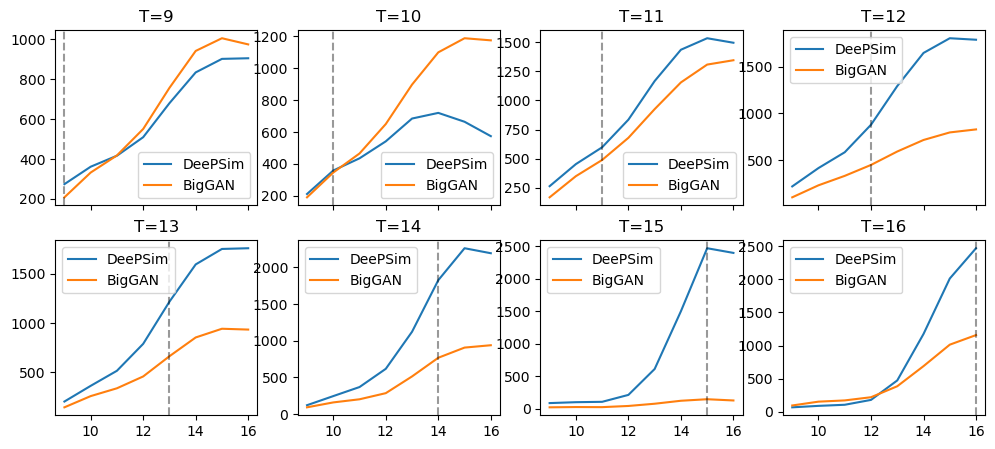

In [ ]:
iChan = 42
figh, axh = plt.subplots(2,4,figsize=(12,5), sharex=True, ) # sharey=True
axs = axh.flatten()
Ts = df_FC["T"].unique()
Tlist = Ts
for axi, iT in enumerate(Ts):
    ax = axs[axi]
    ax.plot(Tlist, df_FC[(df_FC["chan"]==iChan) & (df_FC["T"]==iT)].best_avg_score.iloc[0], label="DeePSim")
    ax.plot(Tlist, df_BG[(df_BG["chan"]==iChan) & (df_BG["T"]==iT)].best_avg_score.iloc[0], label="BigGAN")
    # ax.set_xticks()
    ax.axvline(iT, color="k", linestyle="--", alpha=0.4)
    ax.set_title(f"T={iT}")
    ax.legend()    
    
plt.legend()

#### Mass Compute: Window optimize Results 

In [159]:
def parse_npz_files_wdw(rootdir, netname, layername):
    layerdir = f"{netname}-{layername}_timewdw"
    file_pattern = rf"scores_{layername}_chan(\d*)_T(\d*)-T(\d*)_CholCMA-(BigGAN|fc6)_(\d*).npz"
    pattern = re.compile(file_pattern)
    files = sorted(glob(join(rootdir, layerdir, "*.npz")))
    meta = []
    for file in tqdm(files):
        matches = re.findall(pattern, file)
        if matches:
            chan, Tbeg, Tend, GANname, RND = matches[0]
            data = np.load(file)
            scores_dyn = data["scores_dyn"]
            generations = data["generations"]
            best_score = np.max(scores_dyn,axis=0)
            best_avg_score = np.mean(scores_dyn[generations==generations.max(),:],axis=0)
            meta.append({"file": file, "netname":netname, "layer":layername, 
                         "chan": int(chan), 
                         "Tbeg": int(Tbeg), "Tend": int(Tend), "GANname": GANname, "RND": int(RND),
                         "best_avg_score": best_avg_score, "best_score": best_score})
    df = pd.DataFrame(meta)
    return df

In [160]:
df_wdw_all = []
for layername in ["conv1", "conv2", "conv3", "conv4", "conv5", "conv6", "conv7", "conv8", "conv9", "conv10", "imnetds"]:
    df_FC = parse_npz_files_wdw(convrnn_root, "rgc_intermediate", layername)
    df_wdw_all.append(df_FC)

100%|██████████| 500/500 [00:11<00:00, 42.76it/s]
0it [00:00, ?it/s]


In [161]:
df_wdw_syn = pd.concat(df_wdw_all, axis=0)

In [163]:
df_wdw_syn

,file,netname,layer,chan,Tbeg,Tend,GANname,RND,best_avg_score,best_score
0,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv1,0,1,16,BigGAN,1065,"[6.3141646, 6.3141646, 6.3141646, 6.3141646, 6...","[19.62872, 19.62872, 19.62872, 19.62872, 19.62..."
1,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv1,0,1,16,BigGAN,21396,"[10.345729, 10.345729, 10.345729, 10.345729, 1...","[20.722723, 20.722723, 20.722723, 20.722723, 2..."
2,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv1,0,1,16,BigGAN,3160,"[11.9100065, 11.9100065, 11.9100065, 11.910006...","[20.139132, 20.139132, 20.139132, 20.139132, 2..."
3,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv1,0,1,16,BigGAN,33020,"[12.67449, 12.67449, 12.67449, 12.67449, 12.67...","[20.484127, 20.484127, 20.484127, 20.484127, 2..."
4,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv1,0,1,16,BigGAN,84734,"[18.762552, 18.762552, 18.762552, 18.762552, 1...","[21.498705, 21.498705, 21.498705, 21.498705, 2..."
...,...,...,...,...,...,...,...,...,...,...
495,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv10,49,10,16,fc6,15013,"[126.741295, 302.32327, 419.55792, 578.7508, 6...","[172.04865, 379.6086, 529.72845, 721.04614, 81..."
496,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv10,49,10,16,fc6,246,"[162.4284, 286.4363, 319.61307, 495.12207, 512...","[233.26105, 354.63614, 377.80988, 578.5095, 62..."
497,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv10,49,10,16,fc6,28710,"[195.58467, 324.7854, 408.02402, 540.9073, 595...","[274.23157, 412.98242, 508.05743, 682.01965, 7..."
498,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,rgc_intermediate,conv10,49,10,16,fc6,39648,"[192.24734, 356.71454, 375.64014, 506.51382, 3...","[261.72546, 414.5649, 428.09555, 590.6767, 416..."


In [162]:
df_wdw_syn.Tbeg.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [164]:
def extract_element_mean(row, key='best_avg_score'):
    try:
        return row[key].mean()
    except IndexError:
        return None

# T = 0  # replace with your desired index
# df_convrnn['Tth_element'] = 
df_wdw_syn["best_avg_score_scalar"] = df_wdw_syn.apply(extract_element_mean, axis=1, args=('best_avg_score',)) 
df_wdw_syn["best_score_scalar"] = df_wdw_syn.apply(extract_element_mean, axis=1, args=('best_score',)) 

In [165]:
df_wdw_syn.to_pickle(join(figdir, "df_convrnn_BigGAN_wdw_Evol_score_summary.pkl"))
df_wdw_syn.to_csv(join(figdir, "df_convrnn_BigGAN_wdw_Evol_score_summary.csv"))

##### Visualize

In [179]:
rsp_mean = df_layer.groupby("GANname").agg({"best_avg_score": mean_lists})
rsp_sem = df_layer.groupby("GANname").agg({"best_avg_score": sem_lists})

In [180]:
rsp_mean.loc["fc6","best_avg_score"]

array([22.219404  , 22.219404  , 22.219404  , 22.219404  , 22.219404  ,
       22.219404  , 22.219404  , 22.219404  , 22.219404  , 22.219404  ,
       22.219404  , -0.25019887, -0.25019887, -0.25019887, -0.25019887,
       -0.25019887], dtype=float32)

In [194]:
palette[2]

(0.594508, 0.175701, 0.501241)

In [197]:
import seaborn as sns
# Get the magma palette
palette = sns.color_palette("magma")
# Get the color for 0 and 1
color_0 = palette[1]
color_1 = palette[4]

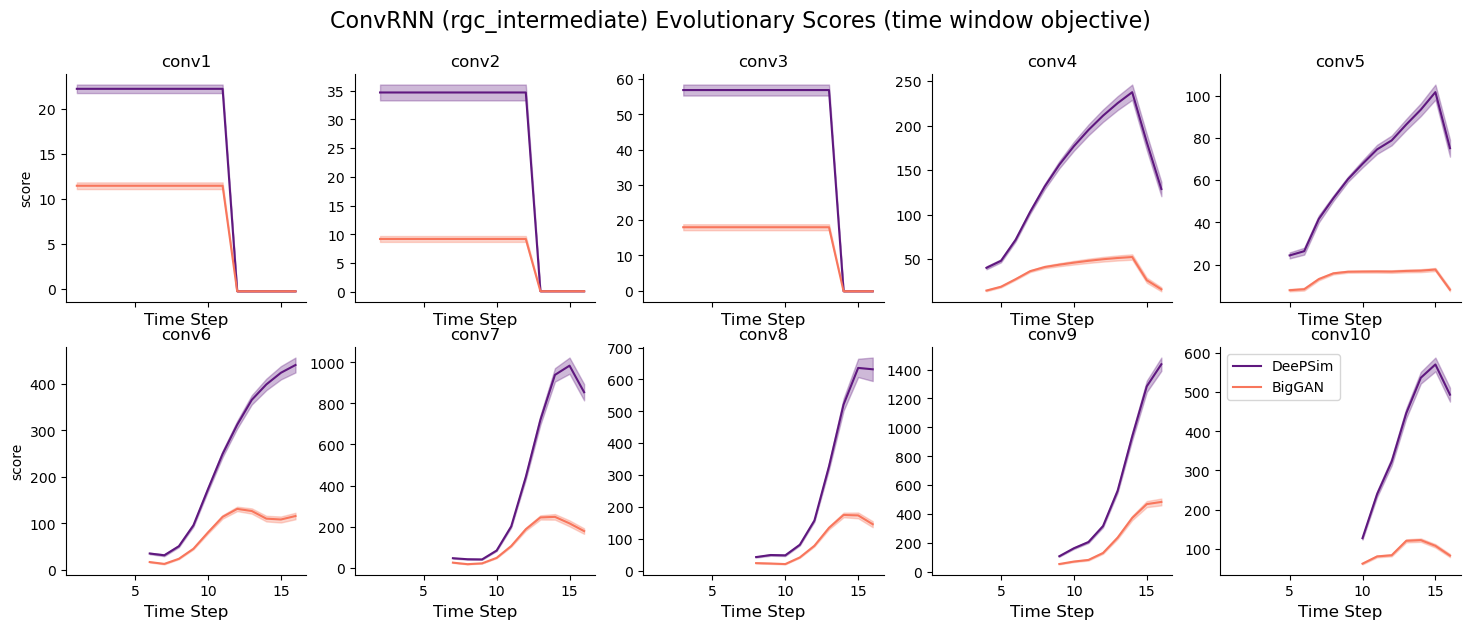

In [198]:
# for optimizer in df_convrnn['optimizer'].unique():
layers = df_wdw_syn.layer.unique()
figh, axs = plt.subplots(2, 5, figsize=(18, 6.5), sharex=True, sharey=False)
for axi, layer in enumerate(layers):
    ax = axs.flatten()[axi]
    df_layer = df_wdw_syn[(df_wdw_syn['layer'] == layer)]
    rsp_mean = df_layer.groupby("GANname").agg({"best_avg_score": mean_lists})
    rsp_sem = df_layer.groupby("GANname").agg({"best_avg_score": sem_lists})
    Tlist = range(df_layer["Tbeg"].min(), df_layer["Tend"].max()+1)
    plt.sca(ax)
    plt.plot(Tlist, rsp_mean.loc["fc6"].best_avg_score, label="DeePSim", color=color_0)
    plt.fill_between(Tlist, rsp_mean.loc["fc6"].best_avg_score-rsp_sem.loc["fc6"].best_avg_score,
                    rsp_mean.loc["fc6"].best_avg_score+rsp_sem.loc["fc6"].best_avg_score, alpha=0.3, color=color_0)
    plt.plot(Tlist, rsp_mean.loc["BigGAN"].best_avg_score, label="BigGAN", color=color_1)
    plt.fill_between(Tlist, rsp_mean.loc["BigGAN"].best_avg_score-rsp_sem.loc["BigGAN"].best_avg_score,
                    rsp_mean.loc["BigGAN"].best_avg_score+rsp_sem.loc["BigGAN"].best_avg_score, alpha=0.3, color=color_1)
    if axi == 9:
        plt.legend()
    # sns.pointplot(data=df_layer, x='Tbeg', y='best_avg_score_scalar', hue='GANname', ax=ax, 
    #                 linestyles='-', palette='magma', #hue_order=['DeePSim', 'fc6'],
    #                 legend=True if axi == 9 else False, alpha=0.7)
    # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
    ax.set_title(layer, )
    ax.set_xlabel('Time Step', fontsize=12)
    if axi == 0 or axi == 5:
        ax.set_ylabel('score', )
    else:
        ax.set_ylabel('')
figh.suptitle(f'ConvRNN (rgc_intermediate) Evolutionary Scores (time window objective)', fontsize=16)
saveallforms(figdir, f'ConvRNN_rgc_intermediate_Window_Evol_Scores_time_traj', figh)

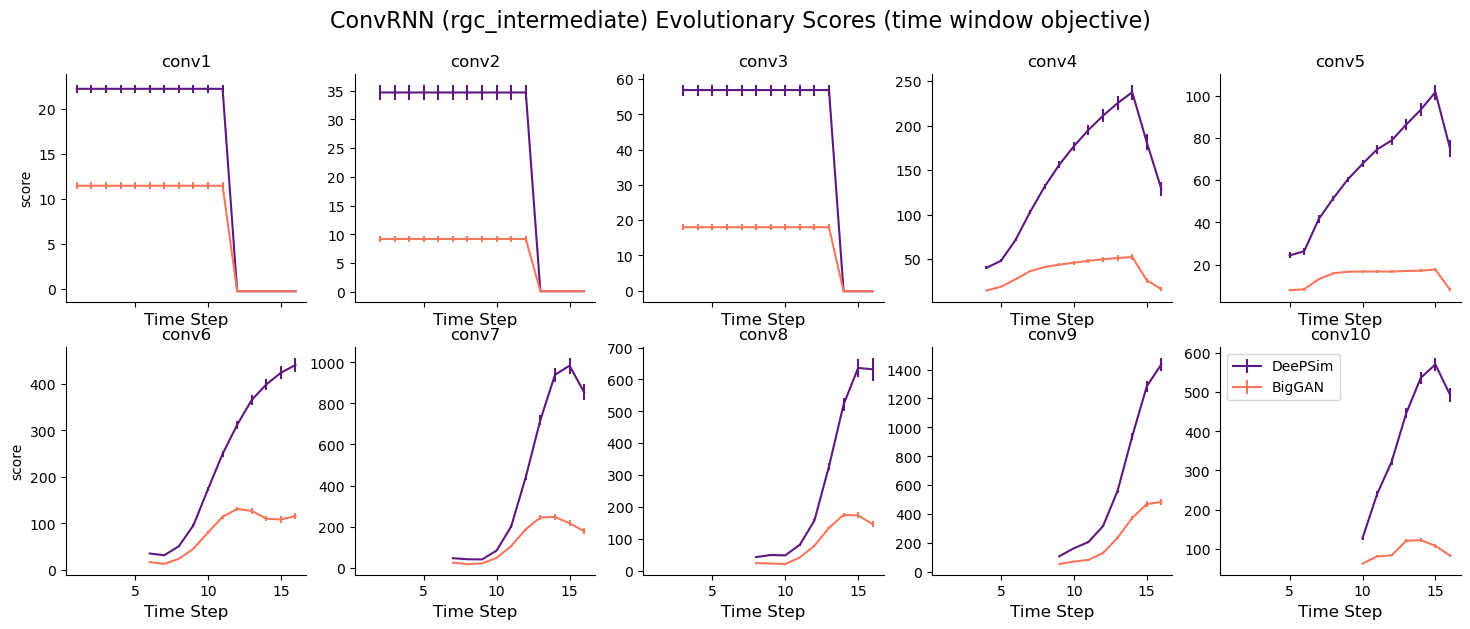

In [199]:
# for optimizer in df_convrnn['optimizer'].unique():
layers = df_wdw_syn.layer.unique()
figh, axs = plt.subplots(2, 5, figsize=(18, 6.5), sharex=True, sharey=False)
for axi, layer in enumerate(layers):
    ax = axs.flatten()[axi]
    df_layer = df_wdw_syn[(df_wdw_syn['layer'] == layer)]
    rsp_mean = df_layer.groupby("GANname").agg({"best_avg_score": mean_lists})
    rsp_sem = df_layer.groupby("GANname").agg({"best_avg_score": sem_lists})
    Tlist = range(df_layer["Tbeg"].min(), df_layer["Tend"].max()+1)
    plt.sca(ax)
    plt.errorbar(Tlist, rsp_mean.loc["fc6"].best_avg_score, yerr=rsp_sem.loc["fc6"].best_avg_score, label="DeePSim", color=color_0)
    plt.errorbar(Tlist, rsp_mean.loc["BigGAN"].best_avg_score, yerr=rsp_sem.loc["BigGAN"].best_avg_score, label="BigGAN", color=color_1)
    # plt.plot(Tlist, rsp_mean.loc["fc6"].best_avg_score, label="DeePSim", color=color_0)
    # plt.fill_between(Tlist, rsp_mean.loc["fc6"].best_avg_score-rsp_sem.loc["fc6"].best_avg_score,
    #                 rsp_mean.loc["fc6"].best_avg_score+rsp_sem.loc["fc6"].best_avg_score, alpha=0.3, color=color_0)
    # plt.plot(Tlist, rsp_mean.loc["BigGAN"].best_avg_score, label="BigGAN", color=color_1)
    # plt.fill_between(Tlist, rsp_mean.loc["BigGAN"].best_avg_score-rsp_sem.loc["BigGAN"].best_avg_score,
    #                 rsp_mean.loc["BigGAN"].best_avg_score+rsp_sem.loc["BigGAN"].best_avg_score, alpha=0.3, color=color_1)
    if axi == 9:
        plt.legend()
    # sns.pointplot(data=df_layer, x='Tbeg', y='best_avg_score_scalar', hue='GANname', ax=ax, 
    #                 linestyles='-', palette='magma', #hue_order=['DeePSim', 'fc6'],
    #                 legend=True if axi == 9 else False, alpha=0.7)
    # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
    ax.set_title(layer, )
    ax.set_xlabel('Time Step', fontsize=12)
    if axi == 0 or axi == 5:
        ax.set_ylabel('score', )
    else:
        ax.set_ylabel('')
figh.suptitle(f'ConvRNN (rgc_intermediate) Evolutionary Scores (time window objective)', fontsize=16)
saveallforms(figdir, f'ConvRNN_rgc_intermediate_Window_Evol_Scores_time_traj_err', figh)

##### Individual Evol Visualize

In [ ]:
df_wdw = parse_npz_files_wdw(convrnn_root, "rgc_intermediate", "conv9")

100%|██████████| 500/500 [00:07<00:00, 62.86it/s] 


In [17]:
rsp_mean = df_wdw.groupby(["Tbeg", "Tend", "GANname"]).agg({"best_avg_score": "mean"})
rsp_sem = df_wdw.groupby(["Tbeg", "Tend", "GANname"]).agg({"best_avg_score": sem_lists})

In [18]:
rsp_mean.loc[9,16,"BigGAN"].best_avg_score

array([ 54.506565,  71.64317 ,  82.92896 , 130.99411 , 237.0577  ,
       373.01764 , 468.99435 , 483.9646  ], dtype=float32)

In [20]:
df_wdw

,file,chan,Tbeg,Tend,GANname,RND,best_avg_score,best_score
0,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,9,16,BigGAN,17073,"[11.5298, 18.242027, 18.706543, 20.078892, 30....","[16.702929, 29.548336, 29.321947, 35.436394, 7..."
1,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,9,16,BigGAN,2127,"[5.755958, 11.742806, 12.347696, 13.147636, 17...","[10.25198, 17.205185, 17.484707, 20.144321, 29..."
2,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,9,16,BigGAN,23569,"[12.169655, 15.772069, 19.780603, 21.024786, 2...","[24.955198, 32.6132, 39.00344, 44.295815, 54.2..."
3,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,9,16,BigGAN,62055,"[7.94934, 14.005925, 16.629293, 18.658564, 27....","[16.390738, 27.45148, 33.869743, 42.554977, 68..."
4,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,9,16,BigGAN,91921,"[20.990023, 38.8964, 48.340584, 55.200733, 64....","[38.81624, 68.938896, 84.56897, 98.22452, 119...."
...,...,...,...,...,...,...,...,...
495,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,49,9,16,fc6,20252,"[77.88883, 118.376564, 134.88434, 186.8664, 33...","[102.60089, 154.86288, 177.43762, 245.29234, 4..."
496,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,49,9,16,fc6,46245,"[160.68108, 281.45682, 354.83734, 522.4869, 88...","[210.61345, 351.3628, 449.41772, 650.90283, 10..."
497,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,49,9,16,fc6,70300,"[121.65916, 222.0122, 284.47824, 441.67636, 76...","[162.55838, 283.6412, 362.33063, 547.8069, 907..."
498,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,49,9,16,fc6,82144,"[139.38249, 254.53369, 339.55035, 510.5082, 80...","[180.14122, 332.12314, 441.15482, 649.5608, 96..."


In [24]:
unit_rsp_mean

best_avg_score
GANname chan                                                   
BigGAN  0     [11.678955, 19.731846, 23.160944, 25.622122, 3...
        1     [57.90508, 97.70034, 123.89844, 164.49905, 218...
        2     [68.78504, 98.86243, 113.59889, 190.87292, 351...
        3     [61.935036, 93.12069, 107.26589, 164.8555, 339...
        4     [47.273396, 81.96294, 104.62138, 147.29897, 20...
...                                                         ...
fc6     45    [145.84494, 184.2869, 217.9852, 337.6556, 602....
        46    [91.3289, 116.80122, 135.10226, 195.04463, 289...
        47    [51.710865, 98.7832, 164.98721, 298.40878, 585...
        48    [35.58245, 75.79939, 106.72339, 177.09583, 358...
        49    [116.85277, 203.74536, 256.33627, 383.084, 653...

[100 rows x 1 columns]

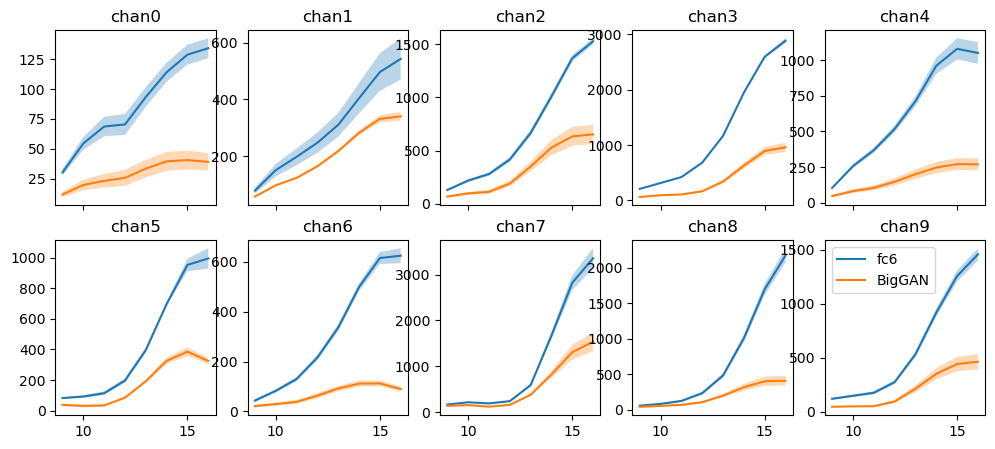

In [25]:
unit_rsp_mean = df_wdw.groupby(["GANname", "chan"]).agg({"best_avg_score": "mean"})
unit_rsp_sem = df_wdw.groupby(["GANname", "chan"]).agg({"best_avg_score": sem_lists})

figh, axs = plt.subplots(2, 5, figsize=(12,5), sharex=True, sharey=False)
for chan in range(10):
    ax = axs.flatten()[chan]
    ax.plot(range(9,17), unit_rsp_mean.loc["fc6",chan].best_avg_score, label="fc6")
    ax.fill_between(range(9,17), unit_rsp_mean.loc["fc6",chan].best_avg_score-unit_rsp_sem.loc["fc6",chan].best_avg_score,
                    unit_rsp_mean.loc["fc6",chan].best_avg_score+unit_rsp_sem.loc["fc6",chan].best_avg_score, alpha=0.3)
    ax.plot(range(9,17), unit_rsp_mean.loc["BigGAN",chan].best_avg_score, label="BigGAN")
    ax.fill_between(range(9,17), unit_rsp_mean.loc["BigGAN",chan].best_avg_score-unit_rsp_sem.loc["BigGAN",chan].best_avg_score,
                    unit_rsp_mean.loc["BigGAN",chan].best_avg_score+unit_rsp_sem.loc["BigGAN",chan].best_avg_score, alpha=0.3)
    ax.set_title(f"chan{chan}")
# plt.plot(range(9,17), rsp_mean.loc[9,16,"fc6"].best_avg_score, label="fc6")
# plt.fill_between(range(9,17), rsp_mean.loc[9,16,"fc6"].best_avg_score-rsp_sem.loc[9,16,"fc6"].best_avg_score,
#                     rsp_mean.loc[9,16,"fc6"].best_avg_score+rsp_sem.loc[9,16,"fc6"].best_avg_score, alpha=0.3)
# plt.plot(range(9,17), rsp_mean.loc[9,16,"BigGAN"].best_avg_score, label="BigGAN")
# plt.fill_between(range(9,17), rsp_mean.loc[9,16,"BigGAN"].best_avg_score-rsp_sem.loc[9,16,"BigGAN"].best_avg_score,
#                     rsp_mean.loc[9,16,"BigGAN"].best_avg_score+rsp_sem.loc[9,16,"BigGAN"].best_avg_score, alpha=0.3)
plt.legend()


In [ ]:
unit_rsp_mean = df_wdw.groupby(["Tbeg", "Tend", "GANname", "chan"]).agg({"best_avg_score": "mean"})
unit_rsp_sem = df_wdw.groupby(["Tbeg", "Tend", "GANname", "chan"]).agg({"best_avg_score": sem_lists})
# Tlist = range(df_wdw["Tbeg"].unique(), df_wdw["Tend"].unique()+1)
plt.figure(figsize=(12,5))
plt.plot(range(9,17), rsp_mean.loc[9,16,"fc6"].best_avg_score, label="fc6")
plt.fill_between(range(9,17), rsp_mean.loc[9,16,"fc6"].best_avg_score-rsp_sem.loc[9,16,"fc6"].best_avg_score,
                    rsp_mean.loc[9,16,"fc6"].best_avg_score+rsp_sem.loc[9,16,"fc6"].best_avg_score, alpha=0.3)
plt.plot(range(9,17), rsp_mean.loc[9,16,"BigGAN"].best_avg_score, label="BigGAN")
plt.fill_between(range(9,17), rsp_mean.loc[9,16,"BigGAN"].best_avg_score-rsp_sem.loc[9,16,"BigGAN"].best_avg_score,
                    rsp_mean.loc[9,16,"BigGAN"].best_avg_score+rsp_sem.loc[9,16,"BigGAN"].best_avg_score, alpha=0.3)
plt.legend()

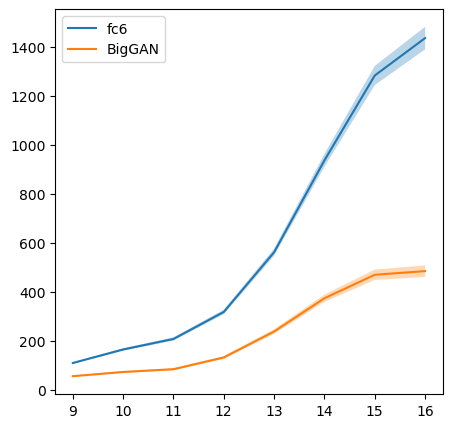

In [30]:
rsp_mean = df_wdw.groupby(["Tbeg", "Tend", "GANname"]).agg({"best_avg_score": "mean"})
rsp_sem = df_wdw.groupby(["Tbeg", "Tend", "GANname"]).agg({"best_avg_score": sem_lists})
# Tlist = range(df_wdw["Tbeg"].unique(), df_wdw["Tend"].unique()+1)
plt.figure(figsize=(5,5))
plt.plot(range(9,17), rsp_mean.loc[9,16,"fc6"].best_avg_score, label="fc6")
plt.fill_between(range(9,17), rsp_mean.loc[9,16,"fc6"].best_avg_score-rsp_sem.loc[9,16,"fc6"].best_avg_score,
                    rsp_mean.loc[9,16,"fc6"].best_avg_score+rsp_sem.loc[9,16,"fc6"].best_avg_score, alpha=0.3)
plt.plot(range(9,17), rsp_mean.loc[9,16,"BigGAN"].best_avg_score, label="BigGAN")
plt.fill_between(range(9,17), rsp_mean.loc[9,16,"BigGAN"].best_avg_score-rsp_sem.loc[9,16,"BigGAN"].best_avg_score,
                    rsp_mean.loc[9,16,"BigGAN"].best_avg_score+rsp_sem.loc[9,16,"BigGAN"].best_avg_score, alpha=0.3)
plt.legend()

#### scratch zoen

In [ ]:
!ls {rootdir}/rgc_intermediate-conv9_dyn

besteachgen_conv9_chan000_T09.jpg  lastgen_conv9_chan000_T09.jpg
besteachgen_conv9_chan000_T10.jpg  lastgen_conv9_chan000_T10.jpg
besteachgen_conv9_chan000_T11.jpg  lastgen_conv9_chan000_T11.jpg
besteachgen_conv9_chan000_T12.jpg  lastgen_conv9_chan000_T12.jpg
besteachgen_conv9_chan000_T13.jpg  lastgen_conv9_chan000_T13.jpg
besteachgen_conv9_chan000_T14.jpg  lastgen_conv9_chan000_T14.jpg
besteachgen_conv9_chan000_T15.jpg  lastgen_conv9_chan000_T15.jpg
besteachgen_conv9_chan000_T16.jpg  lastgen_conv9_chan000_T16.jpg
besteachgen_conv9_chan001_T09.jpg  lastgen_conv9_chan001_T09.jpg
besteachgen_conv9_chan001_T10.jpg  lastgen_conv9_chan001_T10.jpg
besteachgen_conv9_chan001_T11.jpg  lastgen_conv9_chan001_T11.jpg
besteachgen_conv9_chan001_T12.jpg  lastgen_conv9_chan001_T12.jpg
besteachgen_conv9_chan001_T13.jpg  lastgen_conv9_chan001_T13.jpg
besteachgen_conv9_chan001_T14.jpg  lastgen_conv9_chan001_T14.jpg
besteachgen_conv9_chan001_T15.jpg  lastgen_conv9_chan001_T15.jpg
besteachgen_conv9_chan001

In [ ]:
!ls {rootdir}/rgc_intermediate-conv9_timewdw* -d

/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/convrnn_Evol/rgc_intermediate-conv9_timewdw


In [ ]:
layername = 'conv9'
file_pattern = rf"scores_{layername}_chan(\d*)_T(\d*)_CholCMA-BigGAN_(\d*).npz"
pattern = re.compile(file_pattern)
string = "scores_conv9_chan049_T16_CholCMA-BigGAN_70656.npz"
matches = re.findall(pattern, string)
if matches:
    chan, T, RND = matches[0]
    print(f"Channel: {chan}")
    print(f"T: {T}")
    print(f"RND: {RND}")

Channel: 049
T: 16
RND: 70656


In [ ]:
!ls {join(rootdir, layerdir)}

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `ls {join(rootdir, layerdir)}'


In [ ]:
import re
import numpy as np
from os.path import join
from glob import glob

rootdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/convrnn_Evol"
netname = "rgc_intermediate"
layername = "conv8"
layerdir = f"{netname}-{layername}_dyn"
# glob all npz files 
file_pattern = rf"scores_{layername}_chan(\d*)_T(\d*).npz"
pattern = re.compile(file_pattern)
files = sorted(glob(join(rootdir, layerdir, "*.npz")))
# parse all npz files
meta = []
for file in files:
    matches = re.findall(pattern, file)
    if matches:
        chan, T = matches[0]
        data = np.load(file)
        scores_dyn = data["scores_dyn"]
        generations = data["generations"]
        best_score = np.max(scores_dyn, axis=0)
        best_avg_score = np.mean(scores_dyn[generations==generations.max(),:],axis=0)
        meta.append({"file": file, "chan": int(chan), "T": int(T), 
                     "best_avg_score": best_avg_score, "best_score": best_score})
df = pd.DataFrame(meta)

In [ ]:
df

,file,chan,T,best_avg_score,best_score
0,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,8,"[83.96199, 41.146603, 22.383726, 43.363655, 72...","[96.836945, 49.86652, 29.18399, 50.724373, 83...."
1,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,9,"[85.46504, 75.31307, 53.640003, 65.640015, 93....","[107.08717, 97.74732, 72.949455, 86.94891, 121..."
2,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,10,"[10.924087, 6.3848405, 24.090757, 41.977943, 3...","[22.204481, 19.42917, 47.659046, 77.06215, 61...."
3,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,11,"[13.826955, 1.3622758, 18.494696, 72.48216, 70...","[26.141151, 10.297674, 27.116962, 89.46745, 92..."
4,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,0,12,"[13.339071, 1.5572774, 5.430651, 51.23866, 103...","[24.187422, 6.526017, 12.058225, 66.68637, 130..."
...,...,...,...,...,...
445,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,49,12,"[28.992996, 21.139706, 39.746315, 77.30254, 15...","[48.326378, 47.52239, 61.802345, 95.70094, 183..."
446,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,49,13,"[13.666202, 2.1759367, 18.696112, 52.47293, 13...","[43.4911, 38.67868, 46.58024, 74.78628, 167.73..."
447,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,49,14,"[15.07858, 2.3183537, 15.875412, 47.627335, 11...","[32.54178, 28.729565, 37.787865, 65.94803, 144..."
448,/n/holylfs06/LABS/kempner_fellow_binxuwang/Use...,49,15,"[10.334802, 3.5497565, 15.249907, 36.217285, 7...","[23.687174, 15.474216, 27.732758, 47.329903, 1..."


In [ ]:


rootdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/convrnn_Evol"
netname = "rgc_intermediate"
layername = "conv8"
layerdir = f"{netname}-{layername}_dyn_BigGAN"
# glob all npz files 
file_pattern = rf"scores_{layername}_chan(\d*)_T(\d*)_CholCMA-BigGAN_(\d*).npz"
pattern = re.compile(file_pattern)
files = sorted(glob(join(rootdir, layerdir, "*.npz")))
# parse all npz files
meta = []
for file in files:
    matches = re.findall(pattern, file)
    if matches:
        chan, T, RND = matches[0]
        data = np.load(file)
        scores_dyn = data["scores_dyn"]
        generations = data["generations"]
        best_score = np.max(scores_dyn,axis=0)
        best_avg_score = np.mean(scores_dyn[generations==generations.max(),:],axis=0)
        meta.append({"file": file, "chan": int(chan), "T": int(T), "RND": int(RND), 
                     "best_avg_score": best_avg_score, "best_score": best_score})
df = pd.DataFrame(meta)

### CorNet-recurrent evolution

In [45]:
import shutil
import os
import re
import glob
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from os.path import join
from easydict import EasyDict as edict
import numpy as np
import pandas as pd
def sweep_dir(rootdir, unit_pattern, save_pattern):
    rootpath = Path(rootdir)
    unitdirs = sorted(list(rootpath.glob(unit_pattern)))
    df_col = []
    for unitdir in tqdm(unitdirs):
        if ".SelectAdaptivePool2dglobal_pool" in unitdir.name:
            # this layername has _ in it so it will fail the regex below
            parts = unitdir.name.split("_"+".SelectAdaptivePool2dglobal_pool"+"_")
            netname = parts[0]
            layer = ".SelectAdaptivePool2dglobal_pool"
            RFresize = False
            unitstr = parts[1]
        else:
            unit_pat = re.compile("([^.]*)_([^_]*)_([\d_]*)(_RFrsz)?$")
            unit_match = unit_pat.findall(unitdir.name)
            assert len(unit_match) == 1
            unit_match = unit_match[0]
            netname = unit_match[0]
            layer = unit_match[1]
            RFresize = True if unit_match[3] == "_RFrsz" else False
            unitstr = unit_match[2]

        if "_" in unitstr:
            unit = unitstr.split("_")
            unitid = int(unit[0])
            x = int(unit[1])
            y = int(unit[2])
        else:
            unitid = int(unitstr)
            x = None
            y = None
        # print(unit_match)
        print(unitdir.name, "=", netname, layer, unitid, x, y, RFresize)
        unitdict = edict(netname=netname, layer=layer, unitid=unitid, x=x, y=y, RFresize=RFresize)
        savefiles = sorted(list(unitdir.glob("scores*.npz")))
        savefn_pat = re.compile("scores(.*)_(\d\d\d\d\d).npz$")
        for savefn in savefiles:
            savefn_pat_match = savefn_pat.findall(savefn.name)
            assert len(savefn_pat_match) == 1
            savefn_pat_match = savefn_pat_match[0]
            optimmethod = savefn_pat_match[0]
            RND = int(savefn_pat_match[-1])
            if optimmethod.endswith("_fc6"):
                GANname = "fc6"
            else:
                GANname = "BigGAN"
            # print(optimmethod, RND, GANname)
            optimdict = edict(optimmethod=optimmethod, RND=RND, GANname=GANname)
            data = np.load(savefn)
            scores_all = data["scores_all"]
            generations = data["generations"]
            endscores = scores_all[generations == generations.max()].mean()
            maxscores = scores_all.max(axis=0)
            maxstep = np.argmax(scores_all, axis=0)
            df_col.append({**unitdict, **optimdict, **dict(score=endscores, maxscore=maxscores, maxstep=maxstep)})
            # raise  Exception

        # break
    df_evol = pd.DataFrame(df_col)
    # change datatype of columns GANname, layer, optimmethod, netname as string
    # df_evol = df_evol.astype({"GANname": str, "layer": str, "optimmethod": str, "netname": str,
    #                           "score": float, "maxscore": float, "maxstep": int, "RFresize": bool})
    return df_evol

In [46]:
CorNet_dir = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Evol_cmp"

In [48]:
df_cornet = sweep_dir(CorNet_dir, "corner-s_*_*_*_*", "scores*.npz")

  1%|          | 1/160 [00:00<00:25,  6.27it/s]

corner-s_IT.output_0_3_3 = corner-s IT.output 0 3 3 False
corner-s_IT.output_10_3_3 = corner-s IT.output 10 3 3 False


  2%|▏         | 3/160 [00:00<00:15, 10.11it/s]

corner-s_IT.output_11_3_3 = corner-s IT.output 11 3 3 False
corner-s_IT.output_12_3_3 = corner-s IT.output 12 3 3 False
corner-s_IT.output_13_3_3 = corner-s IT.output 13 3 3 False


  4%|▍         | 7/160 [00:00<00:12, 11.84it/s]

corner-s_IT.output_14_3_3 = corner-s IT.output 14 3 3 False
corner-s_IT.output_15_3_3 = corner-s IT.output 15 3 3 False
corner-s_IT.output_16_3_3 = corner-s IT.output 16 3 3 False


  6%|▌         | 9/160 [00:00<00:12, 12.17it/s]

corner-s_IT.output_17_3_3 = corner-s IT.output 17 3 3 False
corner-s_IT.output_18_3_3 = corner-s IT.output 18 3 3 False
corner-s_IT.output_19_3_3 = corner-s IT.output 19 3 3 False


  7%|▋         | 11/160 [00:00<00:12, 12.40it/s]

corner-s_IT.output_1_3_3 = corner-s IT.output 1 3 3 False
corner-s_IT.output_20_3_3 = corner-s IT.output 20 3 3 False


  9%|▉         | 15/160 [00:01<00:13, 10.57it/s]

corner-s_IT.output_21_3_3 = corner-s IT.output 21 3 3 False
corner-s_IT.output_22_3_3 = corner-s IT.output 22 3 3 False
corner-s_IT.output_23_3_3 = corner-s IT.output 23 3 3 False


 11%|█         | 17/160 [00:01<00:12, 11.12it/s]

corner-s_IT.output_24_3_3 = corner-s IT.output 24 3 3 False
corner-s_IT.output_25_3_3 = corner-s IT.output 25 3 3 False
corner-s_IT.output_26_3_3 = corner-s IT.output 26 3 3 False


 13%|█▎        | 21/160 [00:01<00:11, 11.78it/s]

corner-s_IT.output_27_3_3 = corner-s IT.output 27 3 3 False
corner-s_IT.output_28_3_3 = corner-s IT.output 28 3 3 False
corner-s_IT.output_29_3_3 = corner-s IT.output 29 3 3 False


 14%|█▍        | 23/160 [00:02<00:11, 12.09it/s]

corner-s_IT.output_2_3_3 = corner-s IT.output 2 3 3 False
corner-s_IT.output_30_3_3 = corner-s IT.output 30 3 3 False
corner-s_IT.output_31_3_3 = corner-s IT.output 31 3 3 False


 17%|█▋        | 27/160 [00:02<00:10, 12.48it/s]

corner-s_IT.output_32_3_3 = corner-s IT.output 32 3 3 False
corner-s_IT.output_33_3_3 = corner-s IT.output 33 3 3 False
corner-s_IT.output_34_3_3 = corner-s IT.output 34 3 3 False


 18%|█▊        | 29/160 [00:02<00:10, 12.61it/s]

corner-s_IT.output_35_3_3 = corner-s IT.output 35 3 3 False
corner-s_IT.output_36_3_3 = corner-s IT.output 36 3 3 False
corner-s_IT.output_37_3_3 = corner-s IT.output 37 3 3 False


 21%|██        | 33/160 [00:02<00:09, 12.79it/s]

corner-s_IT.output_38_3_3 = corner-s IT.output 38 3 3 False
corner-s_IT.output_39_3_3 = corner-s IT.output 39 3 3 False
corner-s_IT.output_3_3_3 = corner-s IT.output 3 3 3 False


 22%|██▏       | 35/160 [00:02<00:09, 12.82it/s]

corner-s_IT.output_4_3_3 = corner-s IT.output 4 3 3 False
corner-s_IT.output_5_3_3 = corner-s IT.output 5 3 3 False
corner-s_IT.output_6_3_3 = corner-s IT.output 6 3 3 False


 24%|██▍       | 39/160 [00:03<00:09, 12.86it/s]

corner-s_IT.output_7_3_3 = corner-s IT.output 7 3 3 False
corner-s_IT.output_8_3_3 = corner-s IT.output 8 3 3 False
corner-s_IT.output_9_3_3 = corner-s IT.output 9 3 3 False
corner-s_V1.output_0_28_28 = corner-s V1.output 0 28 28 False


 26%|██▌       | 41/160 [00:03<00:17,  6.74it/s]

corner-s_V1.output_10_28_28 = corner-s V1.output 10 28 28 False


 26%|██▋       | 42/160 [00:04<00:19,  6.11it/s]

corner-s_V1.output_11_28_28 = corner-s V1.output 11 28 28 False


 28%|██▊       | 44/160 [00:04<00:21,  5.47it/s]

corner-s_V1.output_12_28_28 = corner-s V1.output 12 28 28 False
corner-s_V1.output_13_28_28 = corner-s V1.output 13 28 28 False


 29%|██▉       | 46/160 [00:04<00:21,  5.21it/s]

corner-s_V1.output_14_28_28 = corner-s V1.output 14 28 28 False
corner-s_V1.output_15_28_28 = corner-s V1.output 15 28 28 False


 30%|███       | 48/160 [00:05<00:22,  5.04it/s]

corner-s_V1.output_16_28_28 = corner-s V1.output 16 28 28 False
corner-s_V1.output_17_28_28 = corner-s V1.output 17 28 28 False


 31%|███       | 49/160 [00:05<00:21,  5.12it/s]

corner-s_V1.output_18_28_28 = corner-s V1.output 18 28 28 False


 32%|███▏      | 51/160 [00:05<00:21,  5.17it/s]

corner-s_V1.output_19_28_28 = corner-s V1.output 19 28 28 False
corner-s_V1.output_1_28_28 = corner-s V1.output 1 28 28 False


 32%|███▎      | 52/160 [00:06<00:23,  4.69it/s]

corner-s_V1.output_20_28_28 = corner-s V1.output 20 28 28 False


 33%|███▎      | 53/160 [00:06<00:29,  3.63it/s]

corner-s_V1.output_21_28_28 = corner-s V1.output 21 28 28 False


 34%|███▍      | 54/160 [00:06<00:28,  3.69it/s]

corner-s_V1.output_22_28_28 = corner-s V1.output 22 28 28 False


 34%|███▍      | 55/160 [00:07<00:27,  3.86it/s]

corner-s_V1.output_23_28_28 = corner-s V1.output 23 28 28 False


 35%|███▌      | 56/160 [00:07<00:25,  4.03it/s]

corner-s_V1.output_24_28_28 = corner-s V1.output 24 28 28 False


 36%|███▋      | 58/160 [00:07<00:22,  4.64it/s]

corner-s_V1.output_25_28_28 = corner-s V1.output 25 28 28 False
corner-s_V1.output_26_28_28 = corner-s V1.output 26 28 28 False


 37%|███▋      | 59/160 [00:07<00:21,  4.74it/s]

corner-s_V1.output_27_28_28 = corner-s V1.output 27 28 28 False


 38%|███▊      | 60/160 [00:08<00:22,  4.42it/s]

corner-s_V1.output_28_28_28 = corner-s V1.output 28 28 28 False


 38%|███▊      | 61/160 [00:08<00:22,  4.46it/s]

corner-s_V1.output_29_28_28 = corner-s V1.output 29 28 28 False


 39%|███▉      | 62/160 [00:08<00:22,  4.42it/s]

corner-s_V1.output_2_28_28 = corner-s V1.output 2 28 28 False


 39%|███▉      | 63/160 [00:08<00:23,  4.17it/s]

corner-s_V1.output_30_28_28 = corner-s V1.output 30 28 28 False


 41%|████      | 65/160 [00:09<00:20,  4.57it/s]

corner-s_V1.output_31_28_28 = corner-s V1.output 31 28 28 False
corner-s_V1.output_32_28_28 = corner-s V1.output 32 28 28 False


 41%|████▏     | 66/160 [00:09<00:20,  4.54it/s]

corner-s_V1.output_33_28_28 = corner-s V1.output 33 28 28 False


 42%|████▏     | 67/160 [00:09<00:21,  4.29it/s]

corner-s_V1.output_34_28_28 = corner-s V1.output 34 28 28 False


 42%|████▎     | 68/160 [00:10<00:22,  4.16it/s]

corner-s_V1.output_35_28_28 = corner-s V1.output 35 28 28 False


 43%|████▎     | 69/160 [00:10<00:22,  4.00it/s]

corner-s_V1.output_36_28_28 = corner-s V1.output 36 28 28 False


 44%|████▍     | 70/160 [00:10<00:23,  3.87it/s]

corner-s_V1.output_37_28_28 = corner-s V1.output 37 28 28 False


 44%|████▍     | 71/160 [00:10<00:23,  3.83it/s]

corner-s_V1.output_38_28_28 = corner-s V1.output 38 28 28 False


 45%|████▌     | 72/160 [00:11<00:22,  3.84it/s]

corner-s_V1.output_39_28_28 = corner-s V1.output 39 28 28 False


 46%|████▌     | 73/160 [00:11<00:23,  3.70it/s]

corner-s_V1.output_3_28_28 = corner-s V1.output 3 28 28 False


 46%|████▋     | 74/160 [00:11<00:22,  3.74it/s]

corner-s_V1.output_4_28_28 = corner-s V1.output 4 28 28 False


 47%|████▋     | 75/160 [00:11<00:22,  3.85it/s]

corner-s_V1.output_5_28_28 = corner-s V1.output 5 28 28 False


 48%|████▊     | 76/160 [00:12<00:20,  4.13it/s]

corner-s_V1.output_6_28_28 = corner-s V1.output 6 28 28 False


 48%|████▊     | 77/160 [00:12<00:19,  4.20it/s]

corner-s_V1.output_7_28_28 = corner-s V1.output 7 28 28 False


 49%|████▉     | 78/160 [00:12<00:20,  4.01it/s]

corner-s_V1.output_8_28_28 = corner-s V1.output 8 28 28 False


 49%|████▉     | 79/160 [00:12<00:22,  3.66it/s]

corner-s_V1.output_9_28_28 = corner-s V1.output 9 28 28 False


 50%|█████     | 80/160 [00:13<00:20,  3.93it/s]

corner-s_V2.output_0_14_14 = corner-s V2.output 0 14 14 False


 51%|█████     | 81/160 [00:14<00:36,  2.16it/s]

corner-s_V2.output_10_14_14 = corner-s V2.output 10 14 14 False


 51%|█████▏    | 82/160 [00:14<00:38,  2.01it/s]

corner-s_V2.output_11_14_14 = corner-s V2.output 11 14 14 False


 52%|█████▏    | 83/160 [00:15<00:35,  2.19it/s]

corner-s_V2.output_12_14_14 = corner-s V2.output 12 14 14 False


 52%|█████▎    | 84/160 [00:15<00:34,  2.19it/s]

corner-s_V2.output_13_14_14 = corner-s V2.output 13 14 14 False


 53%|█████▎    | 85/160 [00:16<00:34,  2.18it/s]

corner-s_V2.output_14_14_14 = corner-s V2.output 14 14 14 False


 54%|█████▍    | 86/160 [00:16<00:32,  2.27it/s]

corner-s_V2.output_15_14_14 = corner-s V2.output 15 14 14 False


 54%|█████▍    | 87/160 [00:16<00:34,  2.14it/s]

corner-s_V2.output_16_14_14 = corner-s V2.output 16 14 14 False


 55%|█████▌    | 88/160 [00:17<00:32,  2.22it/s]

corner-s_V2.output_17_14_14 = corner-s V2.output 17 14 14 False


 56%|█████▌    | 89/160 [00:17<00:31,  2.25it/s]

corner-s_V2.output_18_14_14 = corner-s V2.output 18 14 14 False


 56%|█████▋    | 90/160 [00:18<00:29,  2.33it/s]

corner-s_V2.output_19_14_14 = corner-s V2.output 19 14 14 False


 57%|█████▋    | 91/160 [00:18<00:30,  2.25it/s]

corner-s_V2.output_1_14_14 = corner-s V2.output 1 14 14 False


 57%|█████▊    | 92/160 [00:19<00:31,  2.15it/s]

corner-s_V2.output_20_14_14 = corner-s V2.output 20 14 14 False


 58%|█████▊    | 93/160 [00:20<00:39,  1.69it/s]

corner-s_V2.output_21_14_14 = corner-s V2.output 21 14 14 False


 59%|█████▉    | 94/160 [00:20<00:38,  1.73it/s]

corner-s_V2.output_22_14_14 = corner-s V2.output 22 14 14 False


 59%|█████▉    | 95/160 [00:21<00:34,  1.90it/s]

corner-s_V2.output_23_14_14 = corner-s V2.output 23 14 14 False


 60%|██████    | 96/160 [00:21<00:32,  1.99it/s]

corner-s_V2.output_24_14_14 = corner-s V2.output 24 14 14 False


 61%|██████    | 97/160 [00:21<00:31,  2.01it/s]

corner-s_V2.output_25_14_14 = corner-s V2.output 25 14 14 False


 61%|██████▏   | 98/160 [00:22<00:29,  2.08it/s]

corner-s_V2.output_26_14_14 = corner-s V2.output 26 14 14 False


 62%|██████▏   | 99/160 [00:22<00:30,  1.97it/s]

corner-s_V2.output_27_14_14 = corner-s V2.output 27 14 14 False


 62%|██████▎   | 100/160 [00:23<00:30,  1.98it/s]

corner-s_V2.output_28_14_14 = corner-s V2.output 28 14 14 False


 63%|██████▎   | 101/160 [00:23<00:28,  2.08it/s]

corner-s_V2.output_29_14_14 = corner-s V2.output 29 14 14 False


 64%|██████▍   | 102/160 [00:24<00:27,  2.14it/s]

corner-s_V2.output_2_14_14 = corner-s V2.output 2 14 14 False


 64%|██████▍   | 103/160 [00:24<00:27,  2.10it/s]

corner-s_V2.output_30_14_14 = corner-s V2.output 30 14 14 False


 65%|██████▌   | 104/160 [00:25<00:26,  2.12it/s]

corner-s_V2.output_31_14_14 = corner-s V2.output 31 14 14 False


 66%|██████▌   | 105/160 [00:25<00:26,  2.10it/s]

corner-s_V2.output_32_14_14 = corner-s V2.output 32 14 14 False


 66%|██████▋   | 106/160 [00:26<00:25,  2.13it/s]

corner-s_V2.output_33_14_14 = corner-s V2.output 33 14 14 False


 67%|██████▋   | 107/160 [00:26<00:24,  2.18it/s]

corner-s_V2.output_34_14_14 = corner-s V2.output 34 14 14 False


 68%|██████▊   | 108/160 [00:27<00:23,  2.21it/s]

corner-s_V2.output_35_14_14 = corner-s V2.output 35 14 14 False


 68%|██████▊   | 109/160 [00:27<00:22,  2.28it/s]

corner-s_V2.output_36_14_14 = corner-s V2.output 36 14 14 False


 69%|██████▉   | 110/160 [00:27<00:22,  2.25it/s]

corner-s_V2.output_37_14_14 = corner-s V2.output 37 14 14 False


 69%|██████▉   | 111/160 [00:28<00:21,  2.25it/s]

corner-s_V2.output_38_14_14 = corner-s V2.output 38 14 14 False


 70%|███████   | 112/160 [00:28<00:20,  2.31it/s]

corner-s_V2.output_39_14_14 = corner-s V2.output 39 14 14 False


 71%|███████   | 113/160 [00:29<00:21,  2.21it/s]

corner-s_V2.output_3_14_14 = corner-s V2.output 3 14 14 False


 71%|███████▏  | 114/160 [00:29<00:20,  2.28it/s]

corner-s_V2.output_4_14_14 = corner-s V2.output 4 14 14 False


 72%|███████▏  | 115/160 [00:30<00:19,  2.35it/s]

corner-s_V2.output_5_14_14 = corner-s V2.output 5 14 14 False


 72%|███████▎  | 116/160 [00:30<00:18,  2.33it/s]

corner-s_V2.output_6_14_14 = corner-s V2.output 6 14 14 False


 73%|███████▎  | 117/160 [00:30<00:18,  2.29it/s]

corner-s_V2.output_7_14_14 = corner-s V2.output 7 14 14 False


 74%|███████▍  | 118/160 [00:31<00:18,  2.29it/s]

corner-s_V2.output_8_14_14 = corner-s V2.output 8 14 14 False


 74%|███████▍  | 119/160 [00:31<00:18,  2.23it/s]

corner-s_V2.output_9_14_14 = corner-s V2.output 9 14 14 False


 75%|███████▌  | 120/160 [00:32<00:18,  2.20it/s]

corner-s_V4.output_0_7_7 = corner-s V4.output 0 7 7 False


 76%|███████▌  | 121/160 [00:33<00:28,  1.35it/s]

corner-s_V4.output_10_7_7 = corner-s V4.output 10 7 7 False


 76%|███████▋  | 122/160 [00:35<00:36,  1.03it/s]

corner-s_V4.output_11_7_7 = corner-s V4.output 11 7 7 False


 77%|███████▋  | 123/160 [00:36<00:35,  1.06it/s]

corner-s_V4.output_12_7_7 = corner-s V4.output 12 7 7 False


 78%|███████▊  | 124/160 [00:36<00:32,  1.12it/s]

corner-s_V4.output_13_7_7 = corner-s V4.output 13 7 7 False


 78%|███████▊  | 125/160 [00:37<00:30,  1.14it/s]

corner-s_V4.output_14_7_7 = corner-s V4.output 14 7 7 False


 79%|███████▉  | 126/160 [00:38<00:29,  1.14it/s]

corner-s_V4.output_15_7_7 = corner-s V4.output 15 7 7 False


 79%|███████▉  | 127/160 [00:39<00:29,  1.12it/s]

corner-s_V4.output_16_7_7 = corner-s V4.output 16 7 7 False


 80%|████████  | 128/160 [00:40<00:28,  1.11it/s]

corner-s_V4.output_17_7_7 = corner-s V4.output 17 7 7 False


 81%|████████  | 129/160 [00:41<00:27,  1.14it/s]

corner-s_V4.output_18_7_7 = corner-s V4.output 18 7 7 False


 81%|████████▏ | 130/160 [00:42<00:25,  1.16it/s]

corner-s_V4.output_19_7_7 = corner-s V4.output 19 7 7 False


 82%|████████▏ | 131/160 [00:43<00:26,  1.09it/s]

corner-s_V4.output_1_7_7 = corner-s V4.output 1 7 7 False


 82%|████████▎ | 132/160 [00:44<00:25,  1.09it/s]

corner-s_V4.output_20_7_7 = corner-s V4.output 20 7 7 False


 83%|████████▎ | 133/160 [00:45<00:28,  1.05s/it]

corner-s_V4.output_21_7_7 = corner-s V4.output 21 7 7 False


 84%|████████▍ | 134/160 [00:46<00:25,  1.01it/s]

corner-s_V4.output_22_7_7 = corner-s V4.output 22 7 7 False


 84%|████████▍ | 135/160 [00:47<00:24,  1.02it/s]

corner-s_V4.output_23_7_7 = corner-s V4.output 23 7 7 False


 85%|████████▌ | 136/160 [00:48<00:22,  1.05it/s]

corner-s_V4.output_24_7_7 = corner-s V4.output 24 7 7 False


 86%|████████▌ | 137/160 [00:49<00:21,  1.09it/s]

corner-s_V4.output_25_7_7 = corner-s V4.output 25 7 7 False


 86%|████████▋ | 138/160 [00:49<00:19,  1.11it/s]

corner-s_V4.output_26_7_7 = corner-s V4.output 26 7 7 False


 87%|████████▋ | 139/160 [00:50<00:19,  1.10it/s]

corner-s_V4.output_27_7_7 = corner-s V4.output 27 7 7 False


 88%|████████▊ | 140/160 [00:51<00:18,  1.08it/s]

corner-s_V4.output_28_7_7 = corner-s V4.output 28 7 7 False


 88%|████████▊ | 141/160 [00:52<00:17,  1.09it/s]

corner-s_V4.output_29_7_7 = corner-s V4.output 29 7 7 False


 89%|████████▉ | 142/160 [00:53<00:16,  1.11it/s]

corner-s_V4.output_2_7_7 = corner-s V4.output 2 7 7 False


 89%|████████▉ | 143/160 [00:54<00:14,  1.15it/s]

corner-s_V4.output_30_7_7 = corner-s V4.output 30 7 7 False


 90%|█████████ | 144/160 [00:55<00:16,  1.02s/it]

corner-s_V4.output_31_7_7 = corner-s V4.output 31 7 7 False


 91%|█████████ | 145/160 [00:56<00:15,  1.00s/it]

corner-s_V4.output_32_7_7 = corner-s V4.output 32 7 7 False


 91%|█████████▏| 146/160 [00:57<00:13,  1.04it/s]

corner-s_V4.output_33_7_7 = corner-s V4.output 33 7 7 False


 92%|█████████▏| 147/160 [00:58<00:11,  1.09it/s]

corner-s_V4.output_34_7_7 = corner-s V4.output 34 7 7 False


 92%|█████████▎| 148/160 [00:59<00:10,  1.11it/s]

corner-s_V4.output_35_7_7 = corner-s V4.output 35 7 7 False


 93%|█████████▎| 149/160 [01:00<00:09,  1.11it/s]

corner-s_V4.output_36_7_7 = corner-s V4.output 36 7 7 False


 94%|█████████▍| 150/160 [01:01<00:09,  1.06it/s]

corner-s_V4.output_37_7_7 = corner-s V4.output 37 7 7 False


 94%|█████████▍| 151/160 [01:02<00:08,  1.06it/s]

corner-s_V4.output_38_7_7 = corner-s V4.output 38 7 7 False


 95%|█████████▌| 152/160 [01:02<00:07,  1.08it/s]

corner-s_V4.output_39_7_7 = corner-s V4.output 39 7 7 False


 96%|█████████▌| 153/160 [01:03<00:06,  1.07it/s]

corner-s_V4.output_3_7_7 = corner-s V4.output 3 7 7 False


 96%|█████████▋| 154/160 [01:04<00:05,  1.06it/s]

corner-s_V4.output_4_7_7 = corner-s V4.output 4 7 7 False


 97%|█████████▋| 155/160 [01:05<00:04,  1.06it/s]

corner-s_V4.output_5_7_7 = corner-s V4.output 5 7 7 False


 98%|█████████▊| 156/160 [01:06<00:03,  1.03it/s]

corner-s_V4.output_6_7_7 = corner-s V4.output 6 7 7 False


 98%|█████████▊| 157/160 [01:07<00:02,  1.02it/s]

corner-s_V4.output_7_7_7 = corner-s V4.output 7 7 7 False


 99%|█████████▉| 158/160 [01:08<00:01,  1.03it/s]

corner-s_V4.output_8_7_7 = corner-s V4.output 8 7 7 False


 99%|█████████▉| 159/160 [01:09<00:00,  1.05it/s]

corner-s_V4.output_9_7_7 = corner-s V4.output 9 7 7 False


100%|██████████| 160/160 [01:10<00:00,  2.27it/s]


In [51]:
df_cornet

,netname,layer,unitid,x,y,RFresize,optimmethod,RND,GANname,score,maxscore,maxstep
0,corner-s,IT.output,0,3,3,False,_T0_CholCMA,11882,BigGAN,10.535890,16.993662,2629
1,corner-s,IT.output,0,3,3,False,_T0_CholCMA,28459,BigGAN,7.201660,13.389617,2519
2,corner-s,IT.output,0,3,3,False,_T0_CholCMA,46890,BigGAN,5.526165,10.559281,2649
3,corner-s,IT.output,0,3,3,False,_T0_CholCMA,56684,BigGAN,9.713830,14.175644,2764
4,corner-s,IT.output,0,3,3,False,_T0_CholCMA,59953,BigGAN,9.180512,15.294277,2325
...,...,...,...,...,...,...,...,...,...,...,...,...
7694,corner-s,V4.output,9,7,7,False,_T3_HessCMA,25063,BigGAN,2.907721,3.746930,2744
7695,corner-s,V4.output,9,7,7,False,_T3_HessCMA,32660,BigGAN,2.321779,3.270024,2731
7696,corner-s,V4.output,9,7,7,False,_T3_HessCMA,45329,BigGAN,2.919836,3.963575,2671
7697,corner-s,V4.output,9,7,7,False,_T3_HessCMA,74631,BigGAN,2.419279,3.374189,2031


In [58]:
df_cornet.layer.unique()

array(['IT.output', 'V1.output', 'V2.output', 'V4.output'], dtype=object)

In [75]:
df_cornet['time'] = df_cornet['optimmethod'].str.extract(r'_T(\d+)_', expand=False)
df_cornet['time'] = df_cornet['time'].fillna(0) # Replace NaN values with 0
df_cornet['time'] = df_cornet['time'].astype(int) # Convert the time column to integer type
df_cornet['optimizer'] = df_cornet['optimmethod'].str.extract(r'_T\d+_(.*CMA)', expand=False)

In [104]:
df_cornet.to_pickle(join(figdir, "df_cornet_BigGAN_score_summary.pkl"))
df_cornet.to_csv(join(figdir, "df_cornet_BigGAN_score_summary.csv"))

In [76]:
df_cornet['optimizer'].unique()

array(['CholCMA', 'HessCMA'], dtype=object)

In [94]:
df_cornet.time.unique()

array([0, 1, 2, 3])

#### Visualize

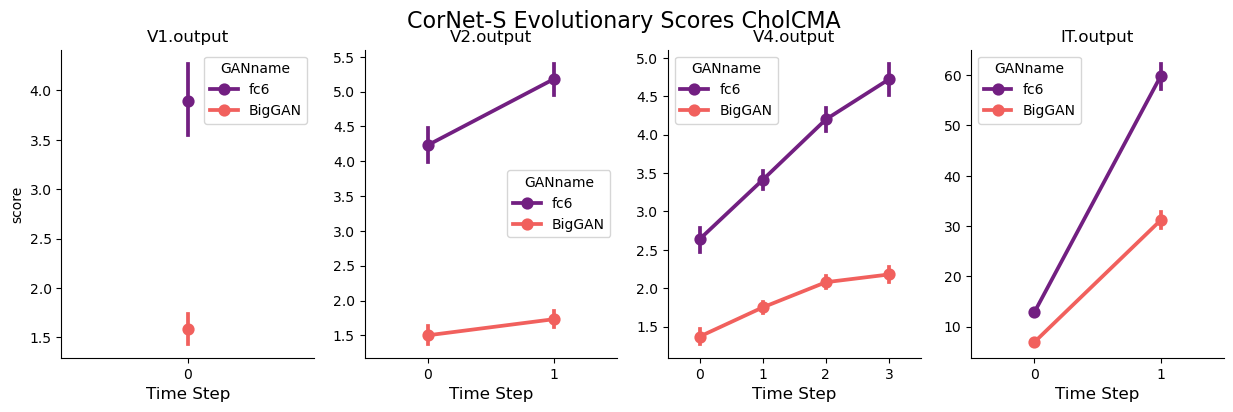

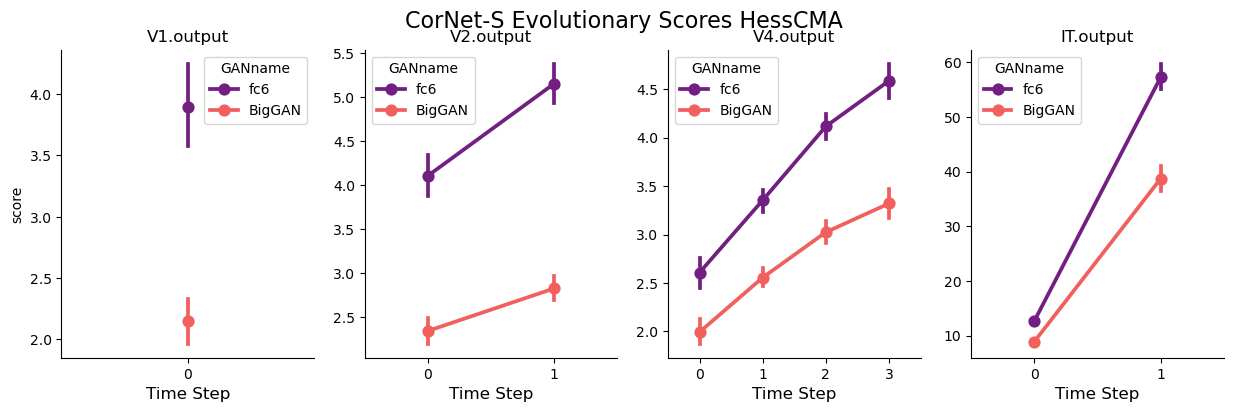

In [106]:
for optimizer in df_cornet['optimizer'].unique():
    figh, axs = plt.subplots(1, 4, figsize=(15, 4), sharex=False, sharey=False)
    layers = ['V1.output', 'V2.output', 'V4.output', 'IT.output',]
    for axi, layer in enumerate(layers):
        ax = axs.flatten()[layers.index(layer)]
        df_layer = df_cornet[(df_cornet['layer'] == layer) & (df_cornet['optimizer'] == optimizer) ]
        sns.pointplot(data=df_layer, x='time', y='score', hue='GANname', ax=ax, 
                      linestyles='-', palette='magma', hue_order=['fc6', 'BigGAN'])
        # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
        ax.set_title(layer, )
        ax.set_xlabel('Time Step', fontsize=12)
        if axi == 0:
            ax.set_ylabel('score', )
        else:
            ax.set_ylabel('')
    figh.suptitle(f'CorNet-S Evolutionary Scores {optimizer}', fontsize=16)
    saveallforms(figdir, f'CorNet-S_Evol_Scores_{optimizer}_time_traj', figh)

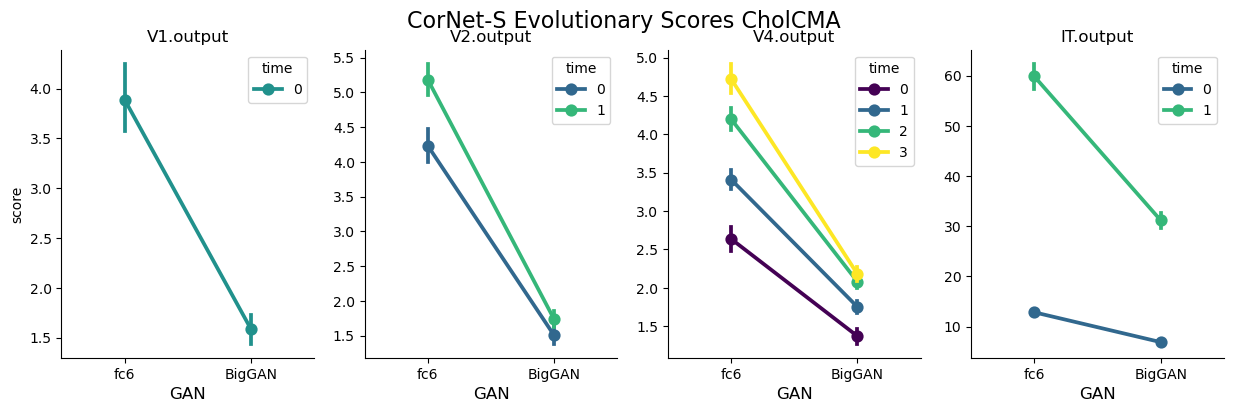

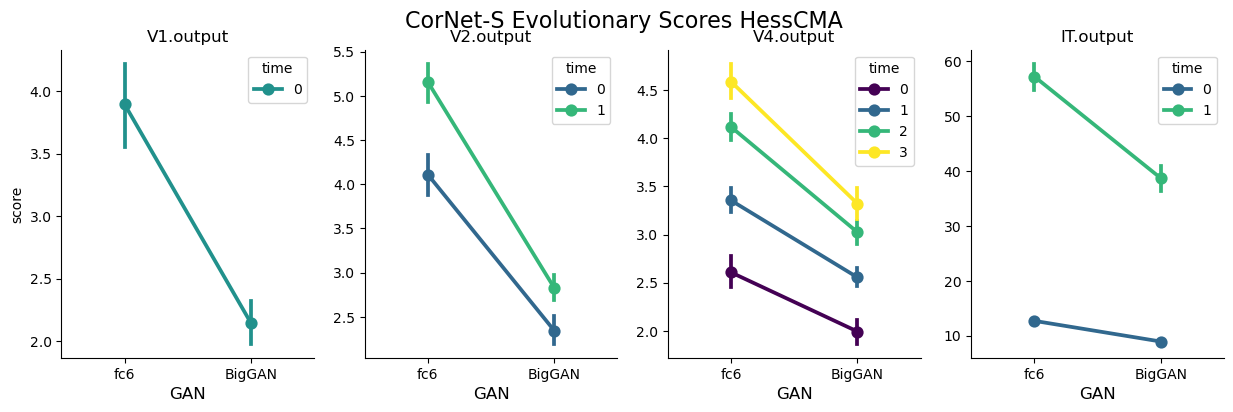

In [107]:
for optimizer in df_cornet['optimizer'].unique():
    figh, axs = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=False)
    layers = ['V1.output', 'V2.output', 'V4.output', 'IT.output',]
    for axi, layer in enumerate(layers):
        ax = axs.flatten()[layers.index(layer)]
        df_layer = df_cornet[(df_cornet['layer'] == layer) & (df_cornet['optimizer'] == optimizer) ]
        sns.pointplot(data=df_layer, x='GANname', y='score', hue='time', ax=ax, 
                      linestyles='-', palette='viridis', order=['fc6', 'BigGAN'])
        # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
        ax.set_title(layer, )
        ax.set_xlabel('GAN', fontsize=12)
        if axi == 0:
            ax.set_ylabel('score', )
        else:
            ax.set_ylabel('')
    figh.suptitle(f'CorNet-S Evolutionary Scores {optimizer}', fontsize=16)
    saveallforms(figdir, f'CorNet-S_Evol_Scores_{optimizer}_line_cmp', figh)

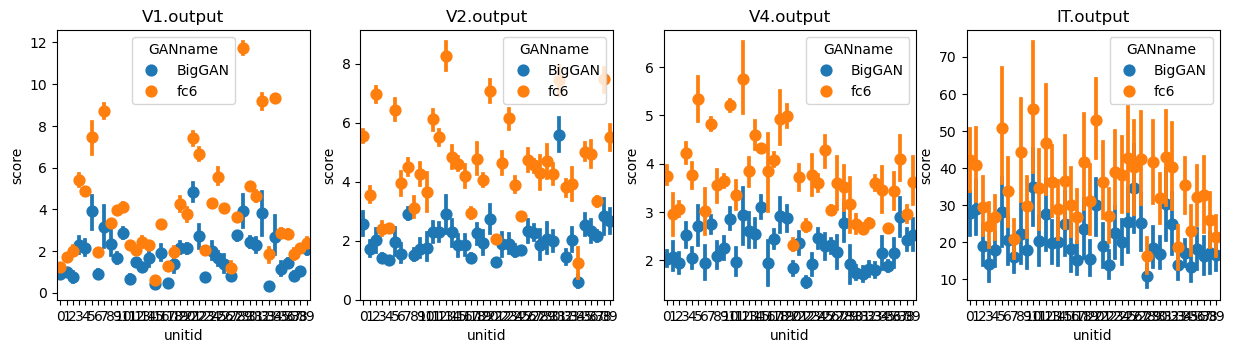

In [63]:
figh, axs = plt.subplots(1, 4, figsize=(15, 3.5), sharex=True, sharey=False)
layers = ['V1.output', 'V2.output', 'V4.output', 'IT.output',]
for layer in layers:
    ax = axs.flatten()[layers.index(layer)]
    df_layer = df_cornet[df_cornet['layer'] == layer]
    sns.pointplot(data=df_layer, x='unitid', y='score', hue='GANname', ax=ax, linestyles='none')
    # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
    ax.set_title(layer)
    ax.set_xlabel('unitid')
    ax.set_ylabel('score')

In [57]:
df_cornet[df_cornet['optimmethod'].str.contains('HessCMA')].groupby(["layer","GANname", "optimmethod"]).agg({"score": ["mean","std"]})

score           
                                           mean        std
layer     GANname optimmethod                             
IT.output BigGAN  _T0_HessCMA          8.929733   3.032199
                  _T1_HessCMA         38.715122  16.481672
          fc6     _T0_HessCMA500_fc6  12.696395   3.358876
                  _T1_HessCMA500_fc6  57.236320  17.682493
V1.output BigGAN  _T0_HessCMA          2.145701   1.383152
          fc6     _T0_HessCMA500_fc6   3.894264   2.561145
V2.output BigGAN  _T0_HessCMA          2.344375   1.129661
                  _T1_HessCMA          2.828209   1.051673
          fc6     _T0_HessCMA500_fc6   4.109293   1.704273
                  _T1_HessCMA500_fc6   5.157254   1.632825
V4.output BigGAN  _T0_HessCMA          1.992187   0.950228
                  _T1_HessCMA          2.554973   0.705018
                  _T2_HessCMA          3.023974   0.872477
                  _T3_HessCMA          3.320931   1.120271
          fc6     _T0_HessCMA500_fc6   2.606501   1.207737
                  _T1_HessCMA500_fc6   3.354237   0.943278
                  _T2_HessCMA500_fc6   4.117711   1.002743
                  _T3_HessCMA500_fc6   4.588306   1.392469

In [55]:
df_cornet[df_cornet['optimmethod'].str.contains('CholCMA')].groupby(["layer","GANname", "optimmethod"]).agg({"score": ["mean","sem"]})

score          
                                        mean       sem
layer     GANname optimmethod                         
IT.output BigGAN  _T0_CholCMA       6.891831  0.150518
                  _T1_CholCMA      31.158604  0.779647
          fc6     _T0_CholCMA_fc6  12.835154  0.217699
                  _T1_CholCMA_fc6  59.832394  1.289046
V1.output BigGAN  _T0_CholCMA       1.586085  0.074322
          fc6     _T0_CholCMA_fc6   3.889491  0.178350
V2.output BigGAN  _T0_CholCMA       1.500264  0.065258
                  _T1_CholCMA       1.732427  0.059402
          fc6     _T0_CholCMA_fc6   4.230990  0.124175
                  _T1_CholCMA_fc6   5.182106  0.113812
V4.output BigGAN  _T0_CholCMA       1.368845  0.047059
                  _T1_CholCMA       1.749404  0.037951
                  _T2_CholCMA       2.077507  0.040694
                  _T3_CholCMA       2.178542  0.048766
          fc6     _T0_CholCMA_fc6   2.635953  0.080499
                  _T1_CholCMA_fc6   3.410181  0.062664
                  _T2_CholCMA_fc6   4.197454  0.071697
                  _T3_CholCMA_fc6   4.720973  0.097375

#### Scratch zone

In [1]:
rootdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/CorNet-recurrent-evol"

In [6]:
!ls {rootdir}

actdyn_summary	proto_summary  summary	  V4-output
IT-output	RF_estimate    V2-output


In [7]:
!ls {rootdir}/actdyn_summary

IT-output-Ch000_actdata.npz	 V2-output-Ch000_act_heatmap.png
IT-output-Ch000_act_heatmap.png  V2-output-Ch000_act_traces.png
IT-output-Ch000_act_traces.png	 V2-output-Ch001_actdata.npz
IT-output-Ch001_actdata.npz	 V2-output-Ch001_act_heatmap.png
IT-output-Ch001_act_heatmap.png  V2-output-Ch001_act_traces.png
IT-output-Ch001_act_traces.png	 V2-output-Ch002_actdata.npz
IT-output-Ch002_actdata.npz	 V2-output-Ch002_act_heatmap.png
IT-output-Ch002_act_heatmap.png  V2-output-Ch002_act_traces.png
IT-output-Ch002_act_traces.png	 V2-output-Ch003_actdata.npz
IT-output-Ch003_actdata.npz	 V2-output-Ch003_act_heatmap.png
IT-output-Ch003_act_heatmap.png  V2-output-Ch003_act_traces.png
IT-output-Ch003_act_traces.png	 V2-output-Ch004_actdata.npz
IT-output-Ch004_actdata.npz	 V2-output-Ch004_act_heatmap.png
IT-output-Ch004_act_heatmap.png  V2-output-Ch004_act_traces.png
IT-output-Ch004_act_traces.png	 V2-output-Ch005_actdata.npz
IT-output-Ch005_actdata.npz	 V2-output-Ch005_act_heatmap.png
IT-output-Ch00

In [25]:
data = np.load(join(rootdir, "actdyn_summary", "V4-output-Ch022_actdata.npz"), allow_pickle=True)

In [26]:
data['scores_trace'].shape

(4, 20)

In [27]:
data["runnum"]

array(5, dtype=int32)

In [21]:
list(data)

['scores_trace', 'runnum', 'Tstep', 'area', 'sublayer', 'channum', 'pos']

In [16]:
data = np.load(join(rootdir, "actdyn_summary", "V4_score_traces.npz"))

In [17]:
data['scores_traces'].shape

(100, 4, 20)

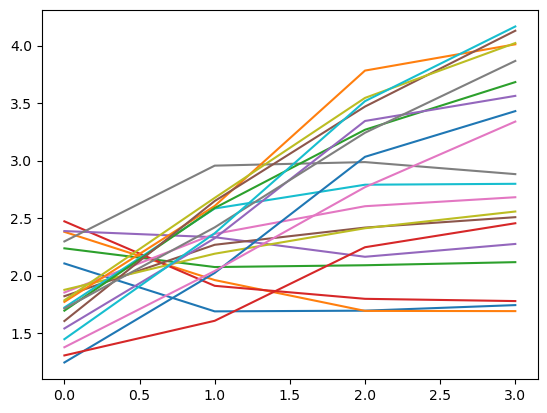

In [18]:
plt.plot(data['scores_traces'][0,:])

### LRM zone 

In [1]:
LRMroot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/Evol_lrm_GAN_cmp"

In [203]:
!du -sh /n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/Evol_lrm_GAN_cmp/synopsis/*

200M	/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/Evol_lrm_GAN_cmp/synopsis/alexnet_lrm1_df_img.pkl
600M	/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/Evol_lrm_GAN_cmp/synopsis/alexnet_lrm2_df_img.pkl
1.6G	/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/Evol_lrm_GAN_cmp/synopsis/alexnet_lrm3_df_img.pkl
1.9G	/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/Evol_lrm_GAN_cmp/synopsis/figsummary


In [205]:
LRMroot = "/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/Evol_lrm_GAN_cmp/" #synopsis/alexnet_lrm3_df_img.pkl
df_lrm3 = pd.read_pickle(join(LRMroot, "synopsis", "alexnet_lrm3_df_img.pkl"))

In [209]:
df_lrm3.loc[1, "mean_score"].shape

(100, 5)

In [212]:
df_lrm3 = df_lrm3.rename(columns={'layerkey': 'layer'})

In [211]:
df_lrm3.methodlab.unique()

array(['BigGAN_CMAES_T0', 'fc6_CMAES_T0', 'BigGAN_CMAES_T1',
       'fc6_CMAES_T1', 'BigGAN_CMAES_T2', 'fc6_CMAES_T2',
       'BigGAN_CMAES_T3', 'fc6_CMAES_T3'], dtype=object)

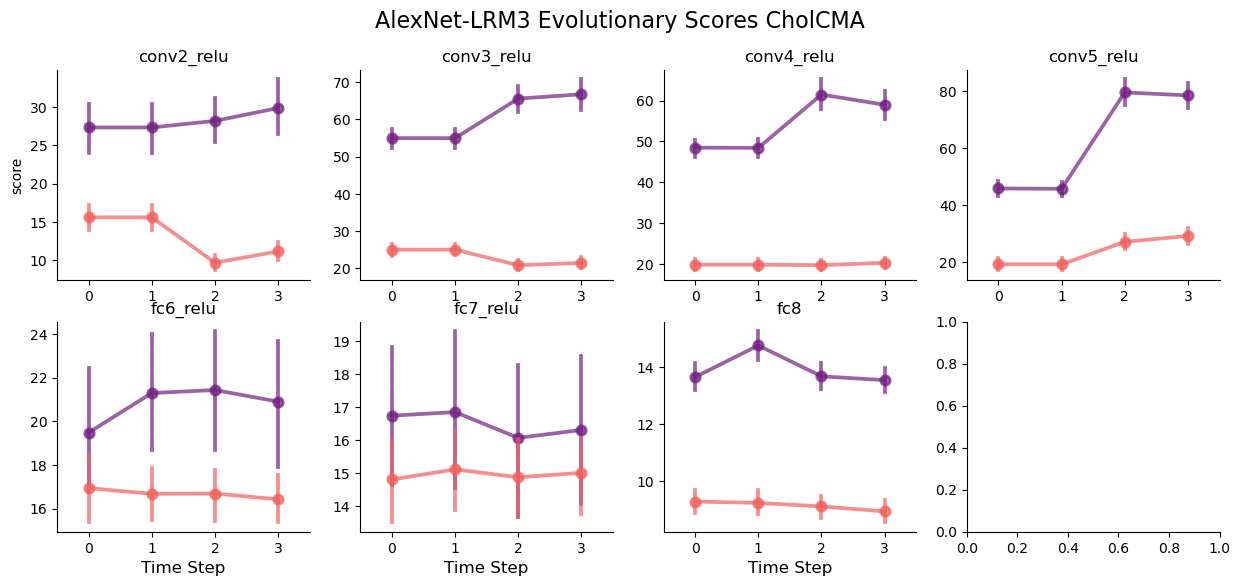

In [221]:
figh, axs = plt.subplots(2, 4, figsize=(15, 6.), sharex=False, sharey=False)
layers = df_lrm3.layer.unique()
for axi, layer in enumerate(layers):
    ax = axs.flatten()[axi]
    df_layer = df_lrm3[(df_lrm3['layer'] == layer)]
    sns.pointplot(data=df_layer, x='iT', y='finalscore', hue='GANname', ax=ax, 
                    linestyles='-', palette='magma', hue_order=['fc6', 'BigGAN'],
                    legend=True if axi == 7 else False, alpha=0.7)
    # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
    ax.set_title(layer, )
    if axi > 3:
        ax.set_xlabel('Time Step', fontsize=12)
    else:
        ax.set_xlabel('')
    if axi == 0:
        ax.set_ylabel('score', )
    else:
        ax.set_ylabel('')
figh.suptitle(f'AlexNet-LRM3 Evolutionary Scores {"CholCMA"}', fontsize=16)
saveallforms(figdir, f'AlexNet-LRM3_Evol_Scores_{"CholCMA"}_time_traj', figh)

In [222]:
df_lrm3.layer.unique()

array(['conv2_relu', 'conv3_relu', 'conv4_relu', 'conv5_relu', 'fc6_relu',
       'fc7_relu', 'fc8'], dtype=object)

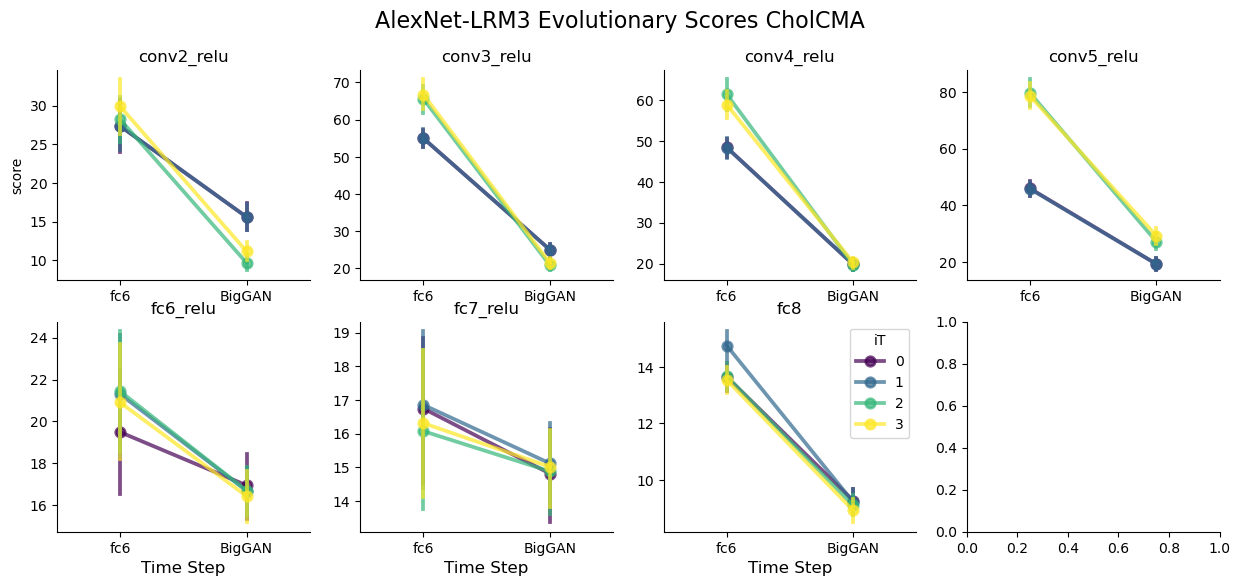

In [223]:
figh, axs = plt.subplots(2, 4, figsize=(15, 6.), sharex=False, sharey=False)
layers = df_lrm3.layer.unique()
for axi, layer in enumerate(layers):
    ax = axs.flatten()[axi]
    df_layer = df_lrm3[(df_lrm3['layer'] == layer)]
    sns.pointplot(data=df_layer, x='GANname', y='finalscore', hue='iT', ax=ax, 
                    linestyles='-', palette='viridis', order=['fc6', 'BigGAN'],
                    legend=True if axi == 6 else False, alpha=0.7)
    # ax.plot(df_layer['unitid'], df_layer['score'], 'o', markersize=2)
    ax.set_title(layer, )
    if axi > 3:
        ax.set_xlabel('Time Step', fontsize=12)
    else:
        ax.set_xlabel('')
    if axi == 0:
        ax.set_ylabel('score', )
    else:
        ax.set_ylabel('')
figh.suptitle(f'AlexNet-LRM3 Evolutionary Scores {"CholCMA"}', fontsize=16)
saveallforms(figdir, f'AlexNet-LRM3_Evol_Scores_{"CholCMA"}_line_cmp', figh)

In [210]:
df_lrm3

,layerkey,iChannel,iT,GANname,methodlab,RND,finalimg,finalscore,gen_slice,mean_score,sem_score,max_score
0,conv2_relu,0,0,BigGAN,BigGAN_CMAES_T0,46965,"[[[132, 132, 132], [138, 138, 138], [122, 122,...",9.955679,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 0.0, 0.0, 0.0, 0.0], [0.149828270077705...","[[nan, nan, nan, nan, nan], [0.103348545730113...","[[0.0, 0.0, 0.0, 0.0, 0.0], [3.050423622131347..."
1,conv2_relu,0,0,BigGAN,BigGAN_CMAES_T0,87668,"[[[132, 132, 132], [138, 138, 138], [122, 122,...",9.703740,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 0.0, 0.0, 0.0, 0.0], [0.042441044002771...","[[nan, nan, nan, nan, nan], [0.030115228146314...","[[0.0, 0.0, 0.0, 0.0, 0.0], [1.064180254936218..."
2,conv2_relu,0,0,BigGAN,BigGAN_CMAES_T0,99704,"[[[132, 132, 132], [138, 138, 138], [122, 122,...",8.100101,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 0.0, 0.0, 0.0, 0.0], [0.193143874406814...","[[nan, nan, nan, nan, nan], [0.13538758456707,...","[[0.0, 0.0, 0.0, 0.0, 0.0], [3.393683433532715..."
3,conv2_relu,0,0,BigGAN,BigGAN_CMAES_T0,18334,"[[[132, 132, 132], [138, 138, 138], [122, 122,...",5.978057,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....","[[nan, nan, nan, nan, nan], [0.0, 0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0...."
4,conv2_relu,0,0,BigGAN,BigGAN_CMAES_T0,15646,"[[[132, 132, 132], [138, 138, 138], [122, 122,...",8.652396,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 0.0, 0.0, 0.0, 0.0], [0.049885790795087...","[[nan, nan, nan, nan, nan], [0.049885798245668...","[[0.0, 0.0, 0.0, 0.0, 0.0], [1.762915849685669..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,fc8,24,3,fc6,fc6_CMAES_T3,78696,"[[[113, 113, 101], [148, 149, 135], [75, 76, 6...",16.228622,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[1.0991312265396118, 1.1211005449295044, 1.52...","[[nan, nan, nan, nan], [0.12930430471897125, 0...","[[1.5232360363006592, 1.5232360363006592, 1.52..."
7996,fc8,24,3,fc6,fc6_CMAES_T3,17800,"[[[125, 117, 115], [111, 103, 100], [80, 76, 6...",14.813672,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[1.0991419553756714, 1.121008276939392, 1.523...","[[nan, nan, nan, nan], [0.12988950312137604, 0...","[[1.5235404968261719, 1.5235404968261719, 1.52..."
7997,fc8,24,3,fc6,fc6_CMAES_T3,71124,"[[[135, 126, 127], [124, 116, 114], [74, 66, 6...",15.582199,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[1.099169373512268, 1.1210062503814697, 1.523...","[[nan, nan, nan, nan], [0.10683422535657883, 0...","[[1.523167610168457, 1.523167610168457, 1.5231..."
7998,fc8,24,3,fc6,fc6_CMAES_T3,877,"[[[145, 147, 133], [131, 132, 114], [84, 83, 6...",15.127925,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[1.0991603136062622, 1.121288537979126, 1.523...","[[nan, nan, nan, nan], [0.10189627856016159, 0...","[[1.5231356620788574, 1.5231356620788574, 1.52..."


In [201]:
!ls {LRMroot}

alexnet_lrm1-fc7_relu-Ch0000  alexnet_lrm2-fc6_relu-Ch0013
alexnet_lrm1-fc7_relu-Ch0001  alexnet_lrm2-fc6_relu-Ch0014
alexnet_lrm1-fc7_relu-Ch0002  alexnet_lrm2-fc6_relu-Ch0015
alexnet_lrm1-fc7_relu-Ch0003  alexnet_lrm2-fc6_relu-Ch0016
alexnet_lrm1-fc7_relu-Ch0004  alexnet_lrm2-fc6_relu-Ch0017
alexnet_lrm1-fc7_relu-Ch0005  alexnet_lrm2-fc6_relu-Ch0018
alexnet_lrm1-fc7_relu-Ch0006  alexnet_lrm2-fc6_relu-Ch0019
alexnet_lrm1-fc7_relu-Ch0007  alexnet_lrm2-fc6_relu-Ch0020
alexnet_lrm1-fc7_relu-Ch0008  alexnet_lrm2-fc6_relu-Ch0021
alexnet_lrm1-fc7_relu-Ch0009  alexnet_lrm2-fc6_relu-Ch0022
alexnet_lrm1-fc7_relu-Ch0010  alexnet_lrm2-fc6_relu-Ch0023
alexnet_lrm1-fc7_relu-Ch0011  alexnet_lrm2-fc6_relu-Ch0024
alexnet_lrm1-fc7_relu-Ch0012  alexnet_lrm2-fc7_relu-Ch0000
alexnet_lrm1-fc7_relu-Ch0013  alexnet_lrm2-fc7_relu-Ch0001
alexnet_lrm1-fc7_relu-Ch0014  alexnet_lrm2-fc7_relu-Ch0002
alexnet_lrm1-fc7_relu-Ch0015  alexnet_lrm2-fc7_relu-Ch0003
alexnet_lrm1-fc7_relu-Ch0016  alexnet_lrm2-fc7_relu-Ch00